In [11]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library(arrow)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [31]:
library(repr)

In [37]:
library(splines)

In [4]:
data <- read_feather('data/CovidCastState.feather')

In [23]:
data_pa = data %>% 
filter(geo_value =="pa") %>%
mutate(cum_deaths = cumsum(deaths), weekday = weekdays(time_value)) %>%
filter(cum_deaths > 10)

In [24]:
head(data_pa)

geo_value time_value          deaths completely_home_prop
1 pa        2020-03-24 20:00:00  7     0.3911314           
2 pa        2020-03-25 20:00:00  3     0.3934487           
3 pa        2020-03-26 20:00:00  4     0.3825154           
4 pa        2020-03-27 20:00:00 12     0.4605405           
5 pa        2020-03-28 20:00:00  7     0.4675549           
6 pa        2020-03-29 20:00:00  9     0.4240459           
  median_home_dwell_time full_time_work_prop part_time_work_prop
1 763.0039               0.03679518          0.04882877         
2 782.0306               0.04282159          0.05488295         
3 805.8743               0.03705723          0.04716426         
4 913.2188               0.02714840          0.03315371         
5 906.1025               0.02522538          0.03257092         
6 761.5343               0.03979982          0.05083767         
  __index_level_0__ cum_deaths weekday  
1 3556              15         Tuesday  
2 3612              18         Wednesday
3 3668              22         Thursday 
4 3724              34         Friday   
5 3780              41         Saturday 
6 3836              50         Sunday

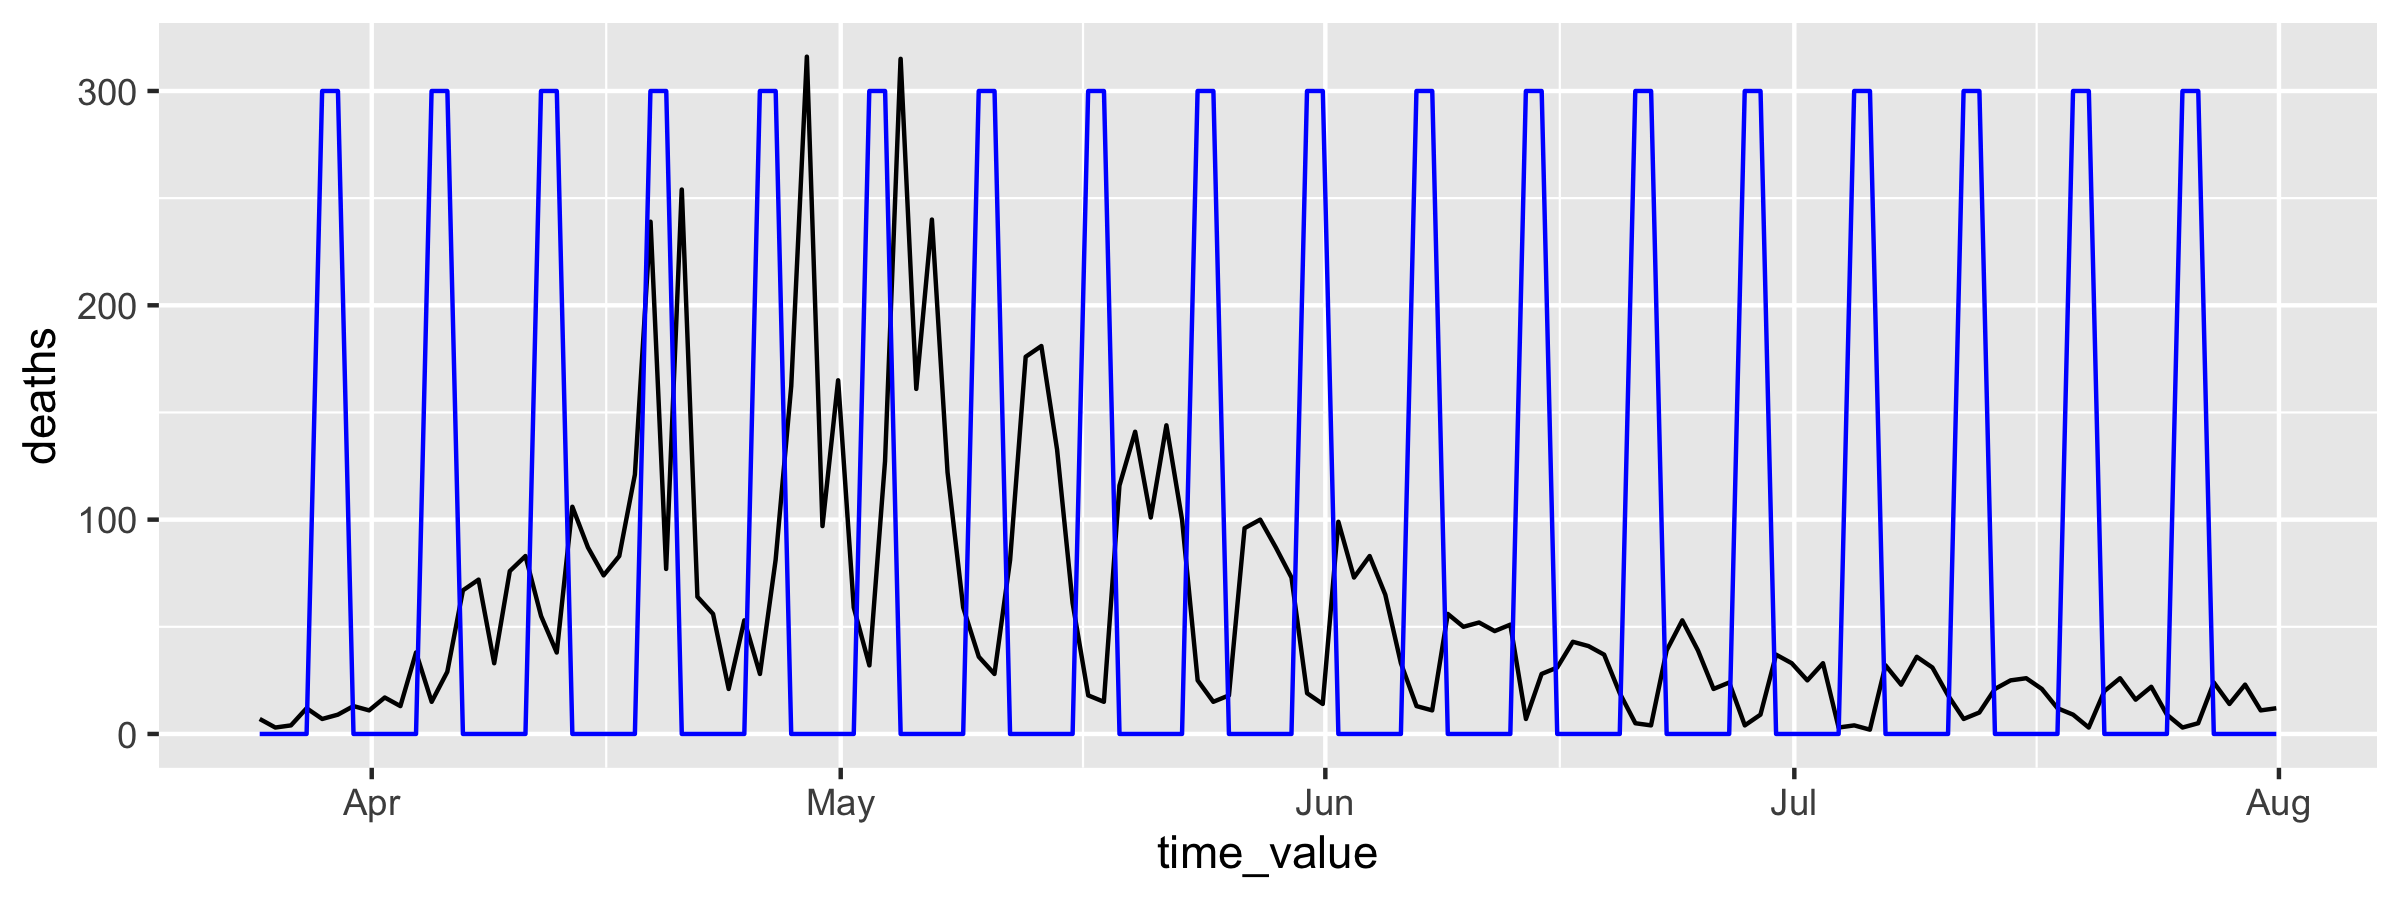

In [35]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)
ggplot(data = data_pa) +
geom_line(aes(x = time_value, y = deaths)) +
geom_line(aes(x = time_value, y = 300*(weekday %in% c('Saturday','Sunday'))), color="blue")

In [51]:
result_1 = glm(deaths ~ ns(time_value, 8), family = "poisson", data=data_pa)

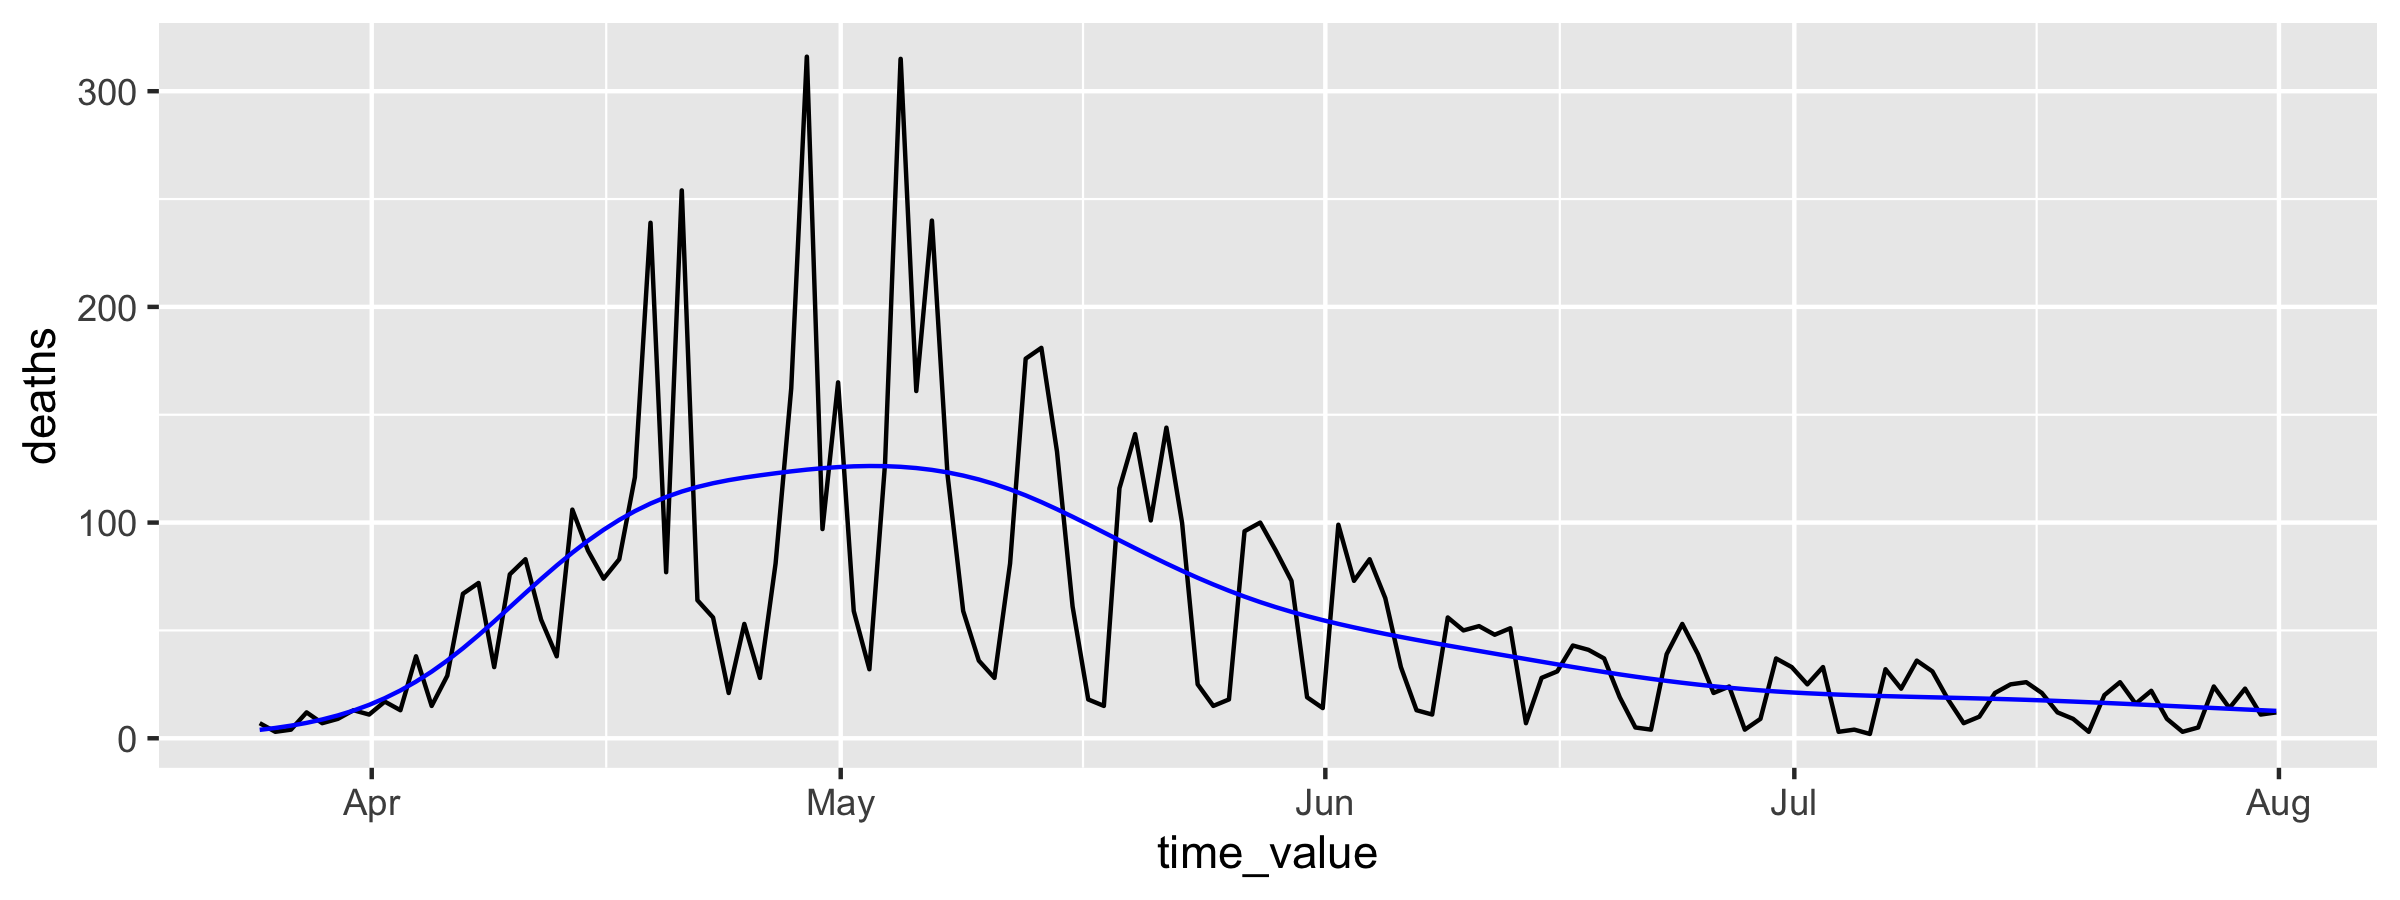

In [52]:
ggplot(data = data_pa) +
geom_line(aes(x = time_value, y = deaths)) +
geom_line(aes(x = time_value, y = exp(predict(result_1))), color="blue")

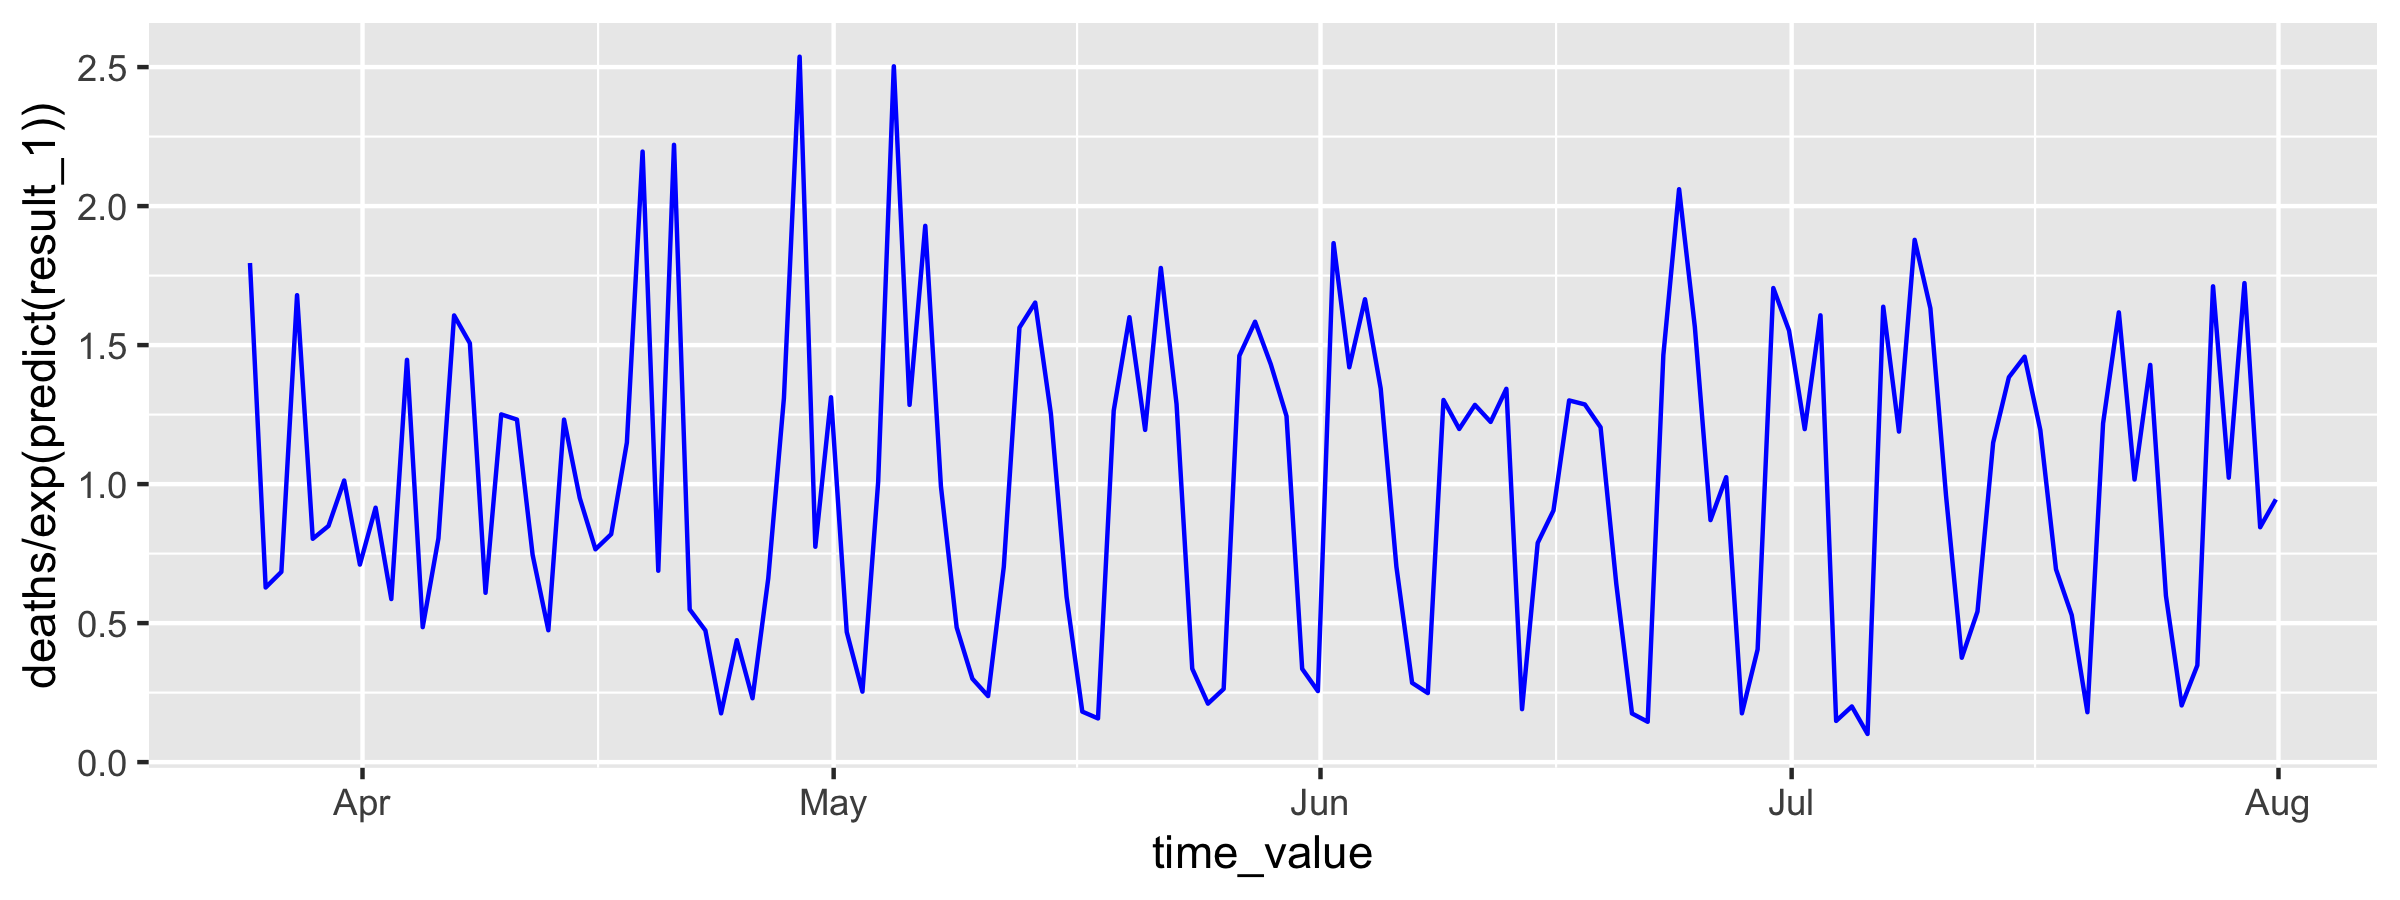

In [134]:
ggplot(data = data_pa) +
geom_line(aes(x = time_value, y = deaths/exp(predict(result_1))), color="blue")

In [102]:
data_we = data_pa %>%
select(time_value, deaths, weekday) %>%
mutate(X1 = (weekday == 'Sunday') - (weekday == 'Monday'),
       X2 = (weekday == 'Sunday') - (weekday == 'Tuesday'),
       X3 = (weekday == 'Sunday') - (weekday == 'Wednesday'),
       X4 = (weekday == 'Sunday') - (weekday == 'Saturday'))

In [151]:
data_nwe = data_we %>%
mutate(X1 = 0, X2 = 0, X3 = 0, X4 = 0)

In [129]:
result_2 = glm(deaths ~ ns(time_value, 8) + (X1 + X2 + X3 + X4), family = "poisson", data=data_we)

In [130]:
summary(result_2)


Call:
glm(formula = deaths ~ ns(time_value, 8) + (X1 + X2 + X3 + X4), 
    family = "poisson", data = data_we)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.4725   -2.2662   -0.1963    1.8916   17.8759  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.26916    0.14664   8.655  < 2e-16 ***
ns(time_value, 8)1  3.47815    0.13675  25.434  < 2e-16 ***
ns(time_value, 8)2  3.54535    0.16840  21.053  < 2e-16 ***
ns(time_value, 8)3  2.70030    0.15507  17.413  < 2e-16 ***
ns(time_value, 8)4  2.32802    0.17616  13.215  < 2e-16 ***
ns(time_value, 8)5  1.61356    0.18138   8.896  < 2e-16 ***
ns(time_value, 8)6  0.69357    0.15635   4.436 9.16e-06 ***
ns(time_value, 8)7  4.08857    0.32177  12.707  < 2e-16 ***
ns(time_value, 8)8 -0.70608    0.13551  -5.210 1.88e-07 ***
X1                 -0.45889    0.02494 -18.401  < 2e-16 ***
X2                 -0.44096    0.02506 -17.599  < 2e-16 ***
X3                 -0.27270  

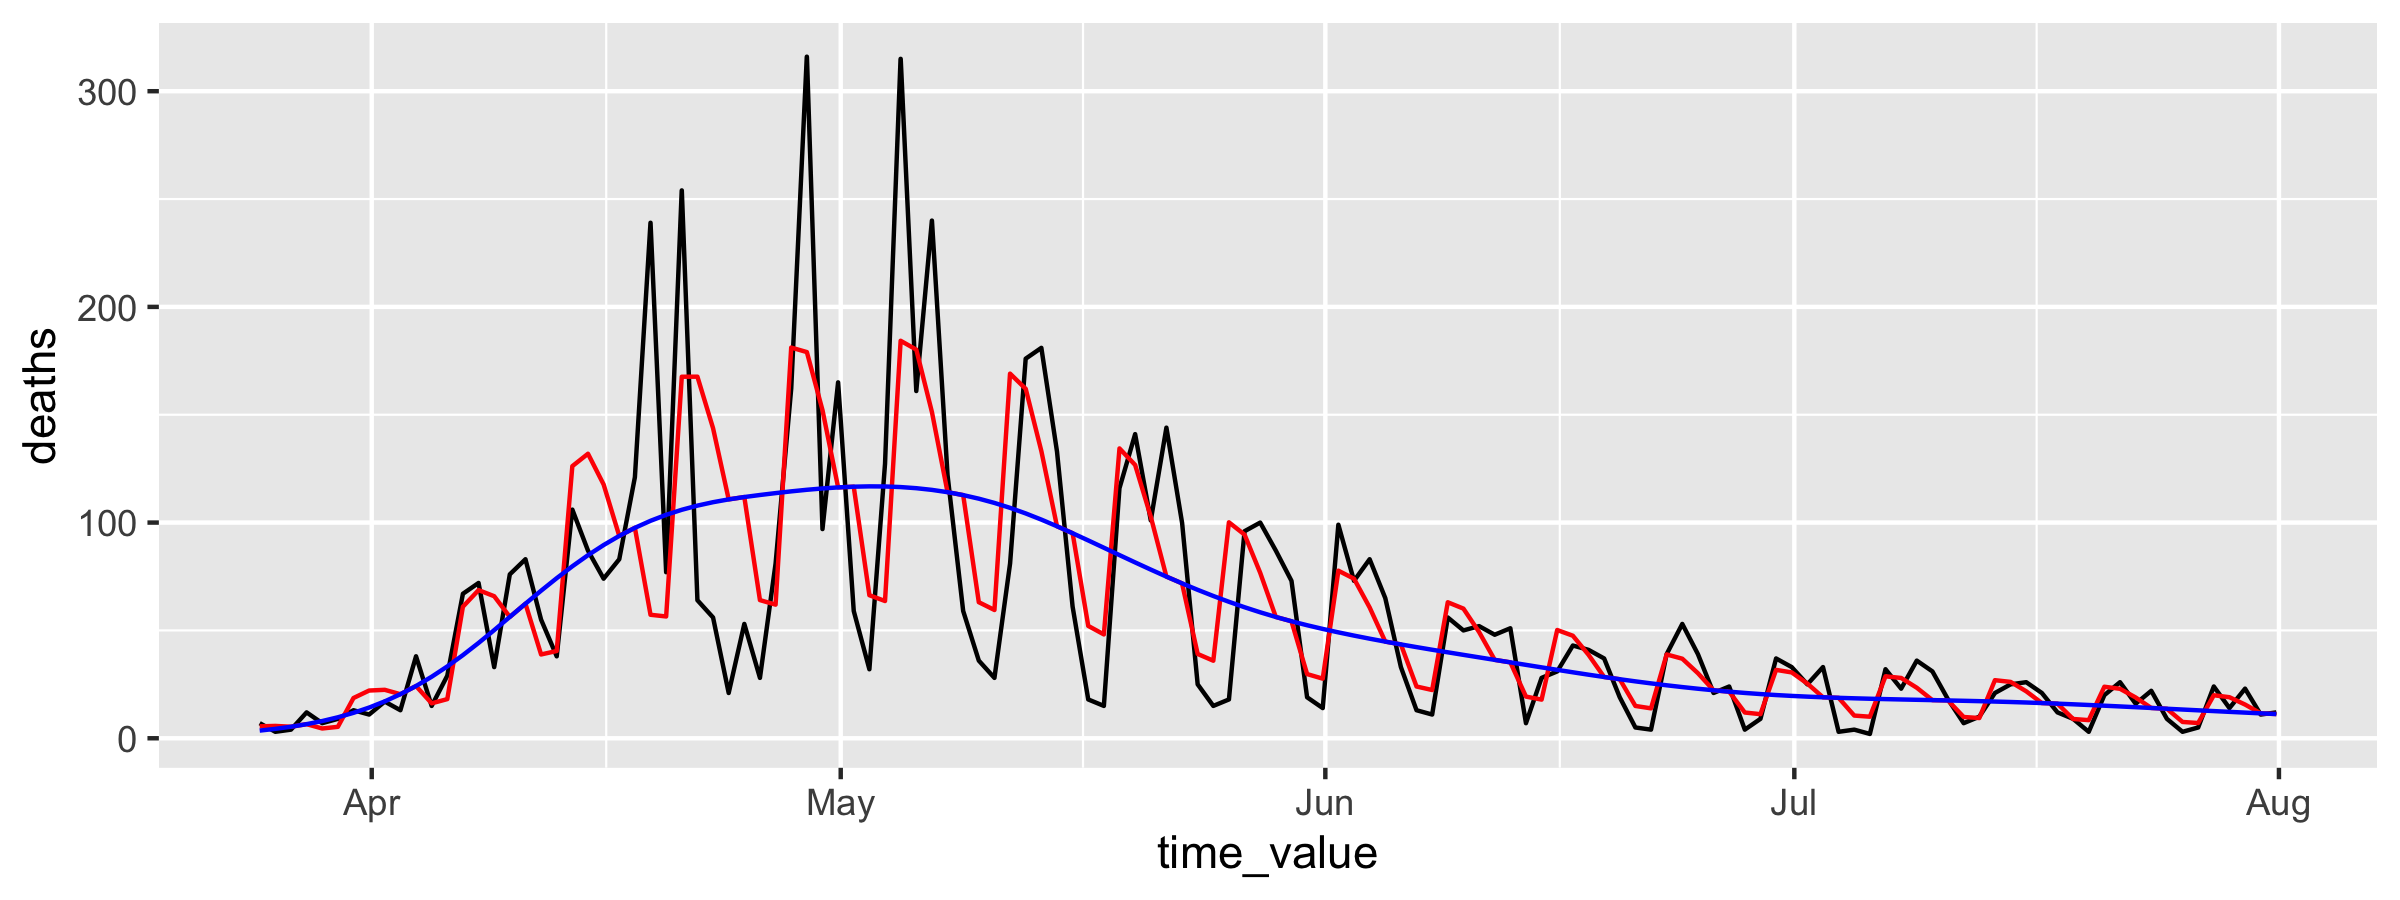

In [131]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths)) +
geom_line(aes(x = time_value, y = exp(predict(result_2))), color='red') +
geom_line(aes(x = time_value, y = exp(predict(result_2, newdata=data_nwe))), color='blue')

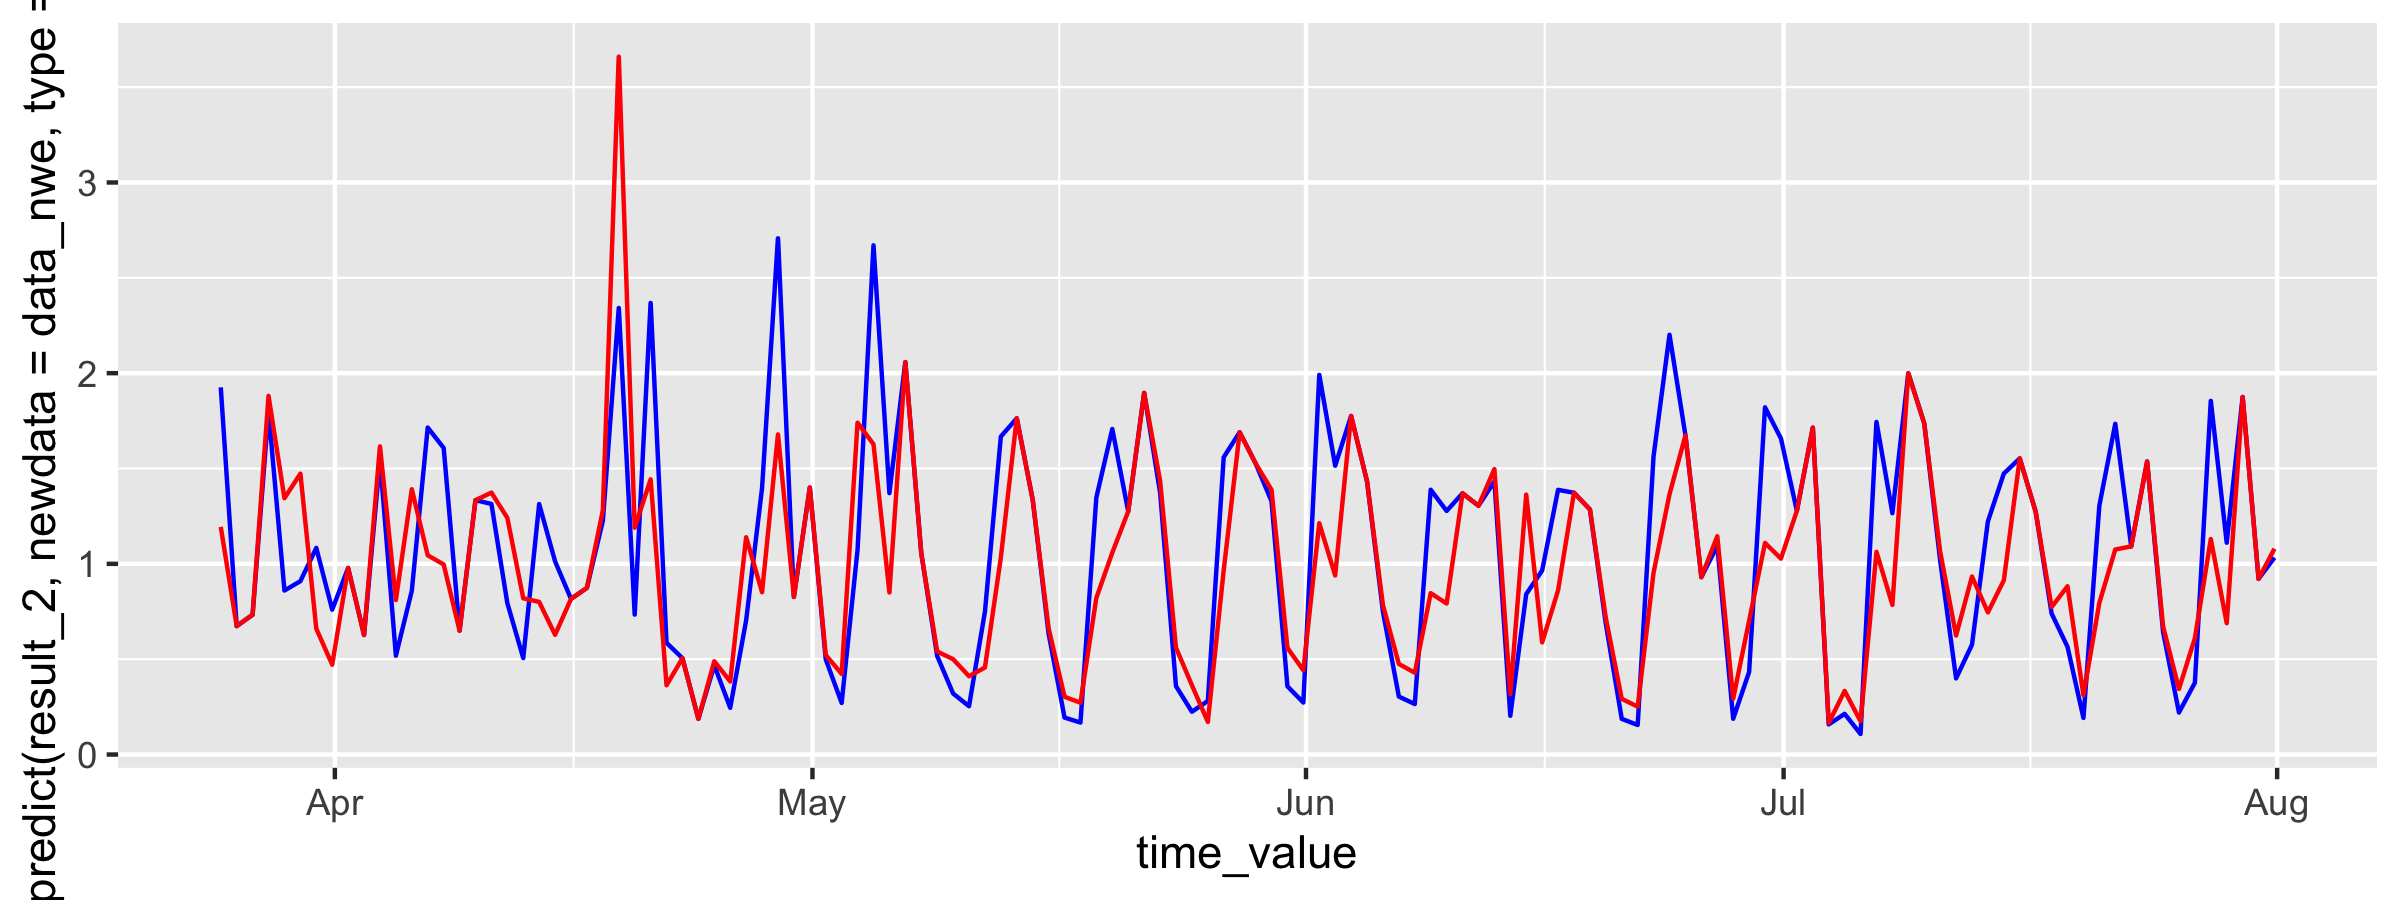

In [166]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths / predict(result_2, newdata=data_nwe, type="response")), color='blue') +
geom_line(aes(x = time_value, 
              y = (deaths / predict(result_2, type="response"))), color='red')

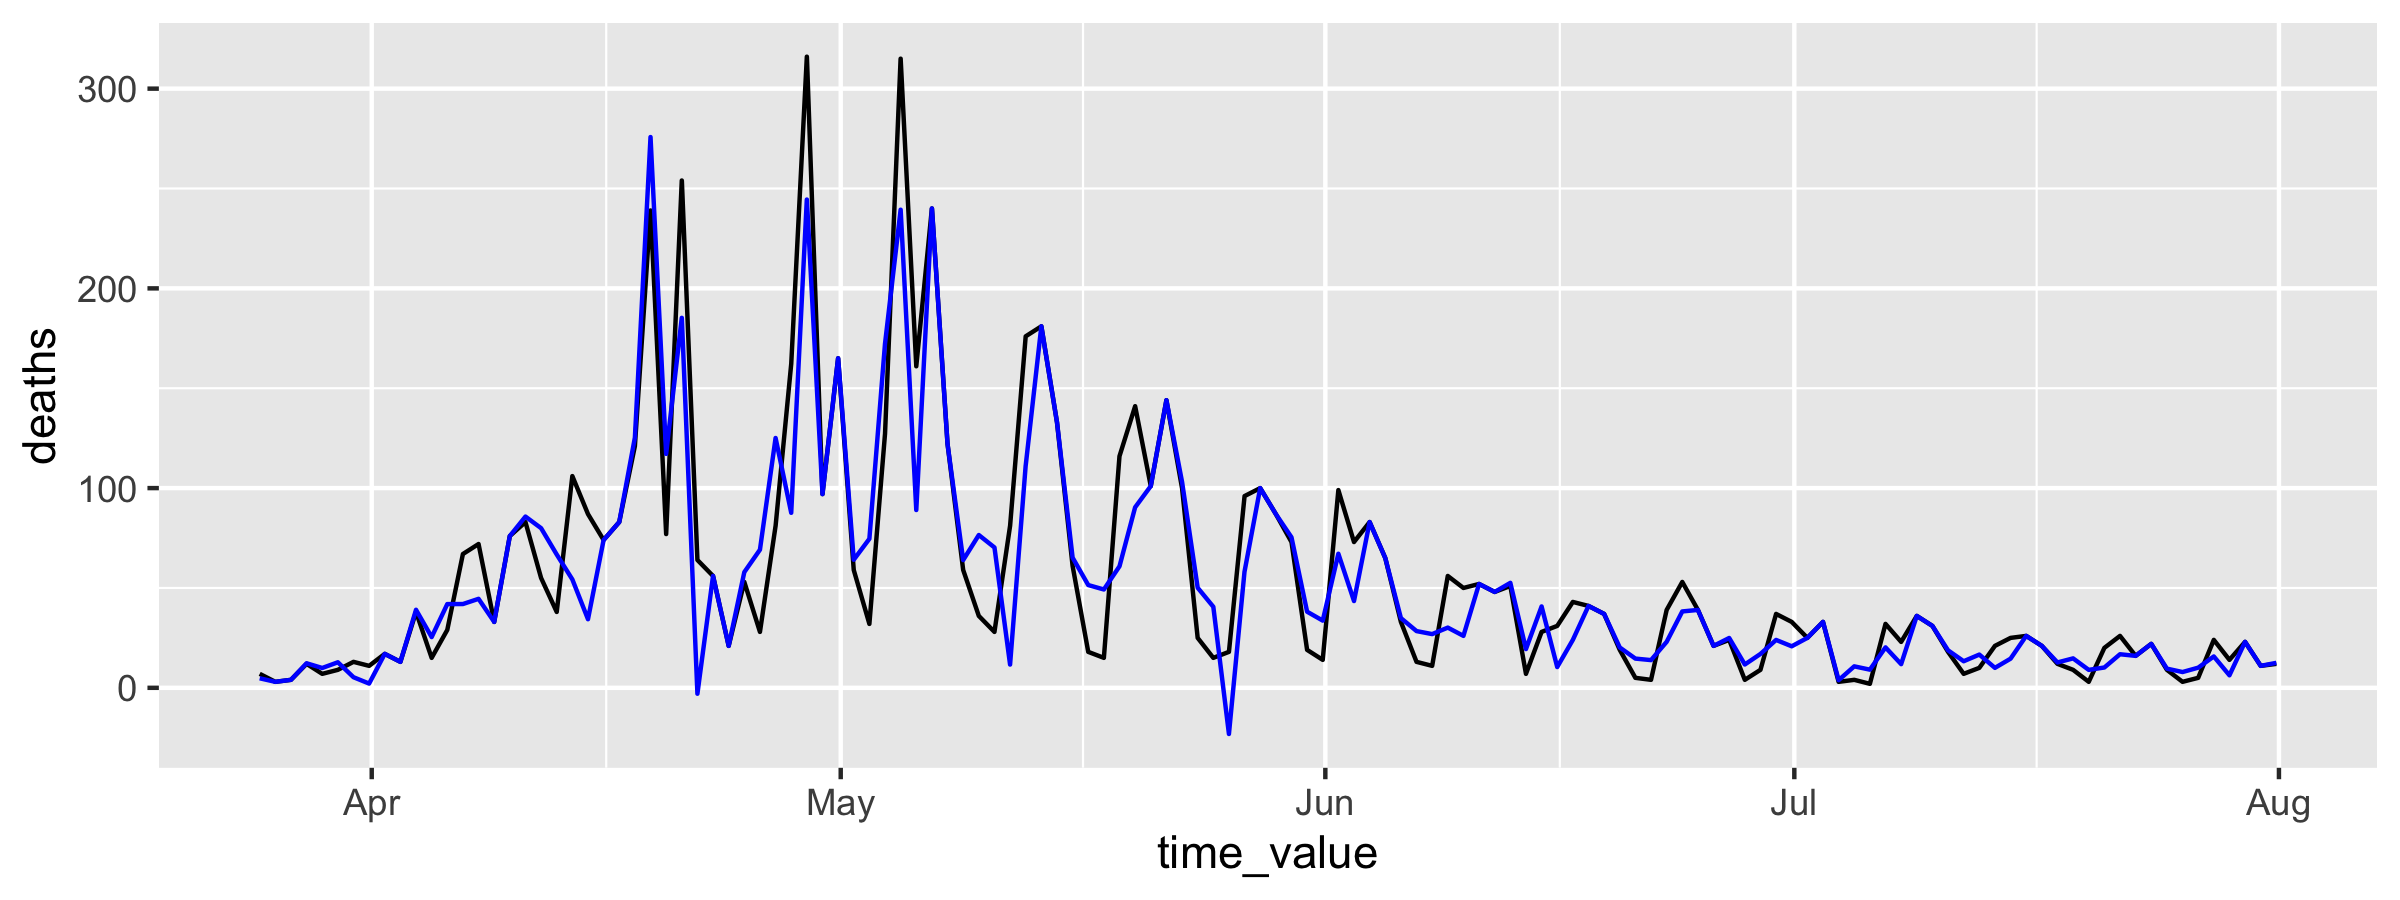

In [165]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths)) +
geom_line(aes(x = time_value, y = deaths - exp(predict(result_2)) +exp(predict(result_2, newdata=data_nwe))), color='blue')

In [145]:
result_3 = glm(deaths ~ ns(time_value, 8) * (X1 + X2 + X3 + X4), family = "quasipoisson", data=data_we)

In [146]:
summary(result_3)


Call:
glm(formula = deaths ~ ns(time_value, 8) * (X1 + X2 + X3 + X4), 
    family = "quasipoisson", data = data_we)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.4906   -1.5486   -0.5188    1.3159    8.3820  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.10972    0.63345   1.752  0.08340 .  
ns(time_value, 8)1     3.64846    0.58104   6.279 1.39e-08 ***
ns(time_value, 8)2     3.50185    0.73554   4.761 7.84e-06 ***
ns(time_value, 8)3     2.86554    0.66758   4.292 4.66e-05 ***
ns(time_value, 8)4     2.44046    0.76706   3.182  0.00205 ** 
ns(time_value, 8)5     1.54981    0.79988   1.938  0.05600 .  
ns(time_value, 8)6     0.85396    0.68277   1.251  0.21447    
ns(time_value, 8)7     4.35857    1.38839   3.139  0.00233 ** 
ns(time_value, 8)8    -0.82998    0.63841  -1.300  0.19709    
X1                    -0.71836    1.32490  -0.542  0.58910    
X2                    -1.18578    1.02365  -1.158  

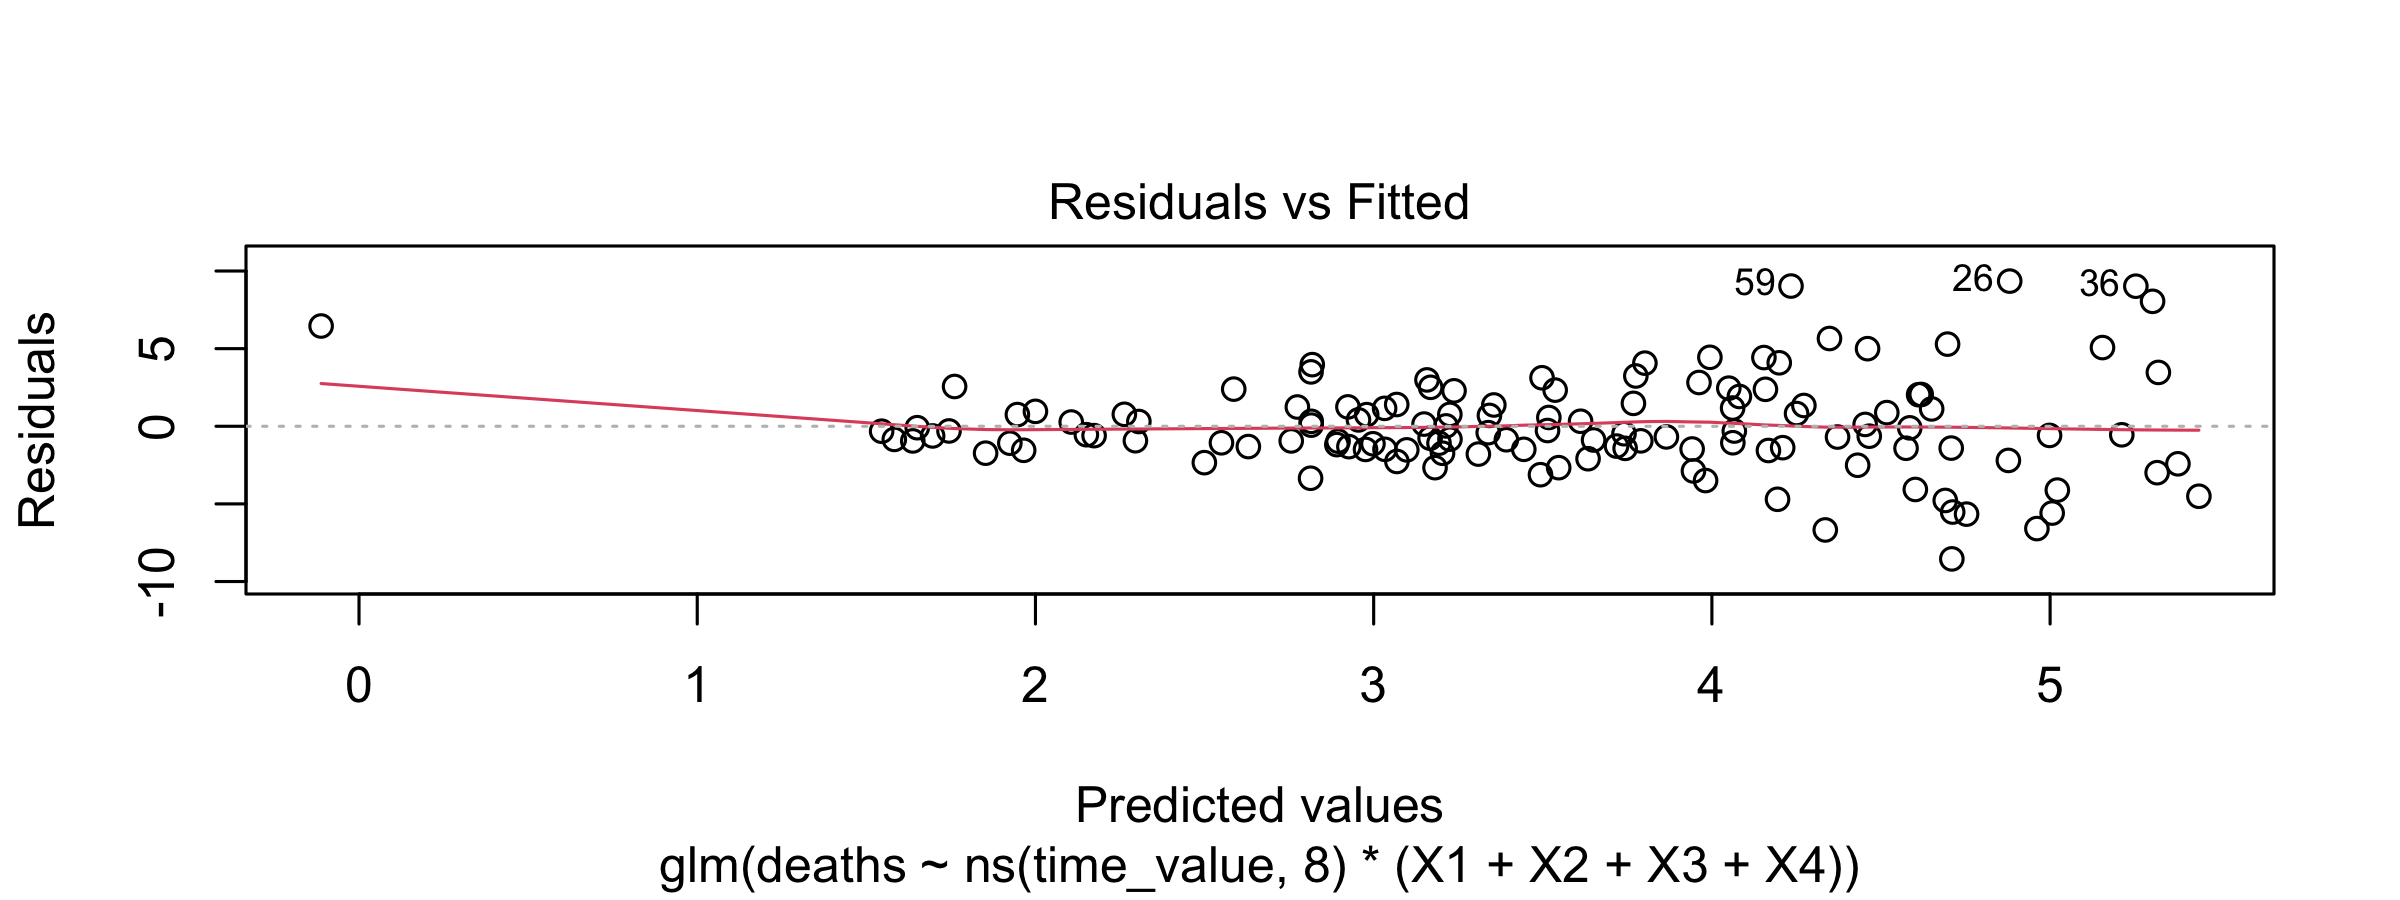

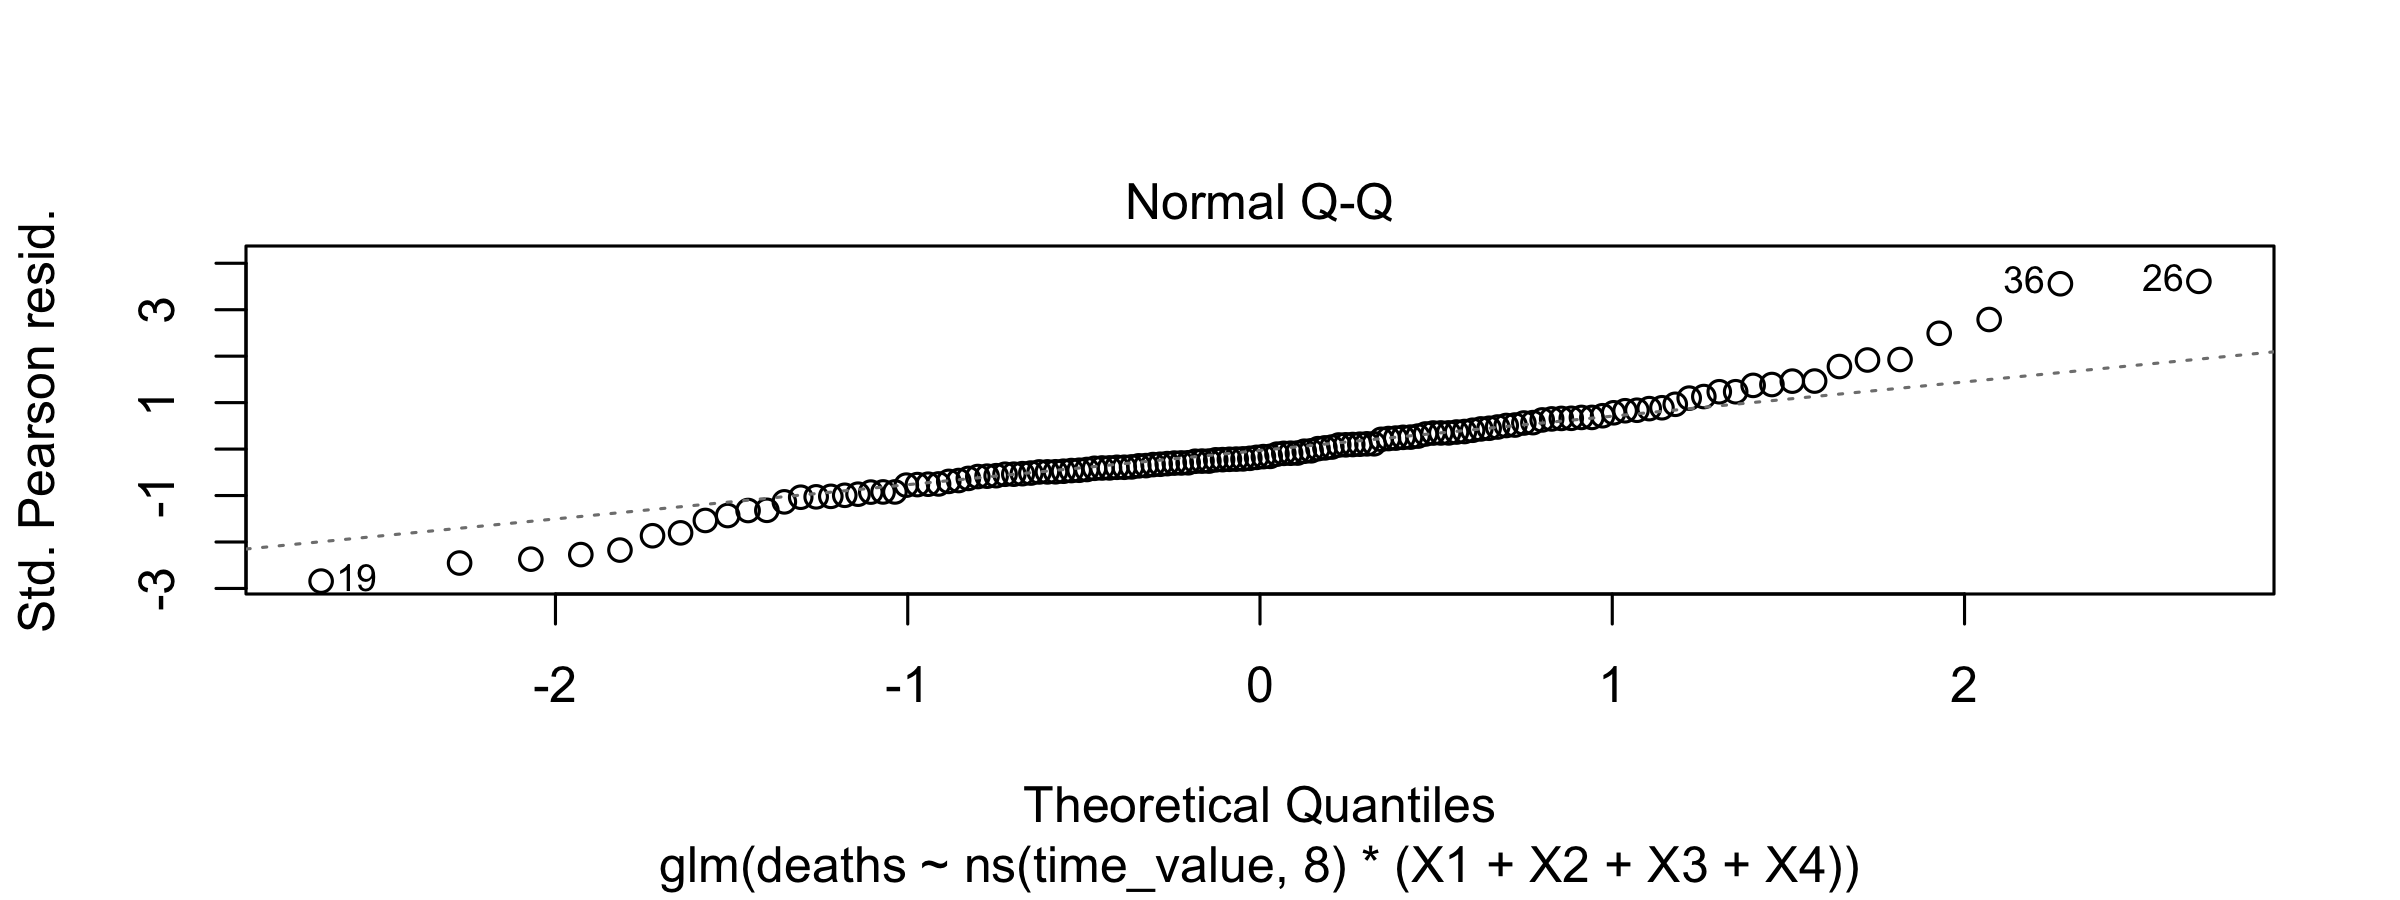

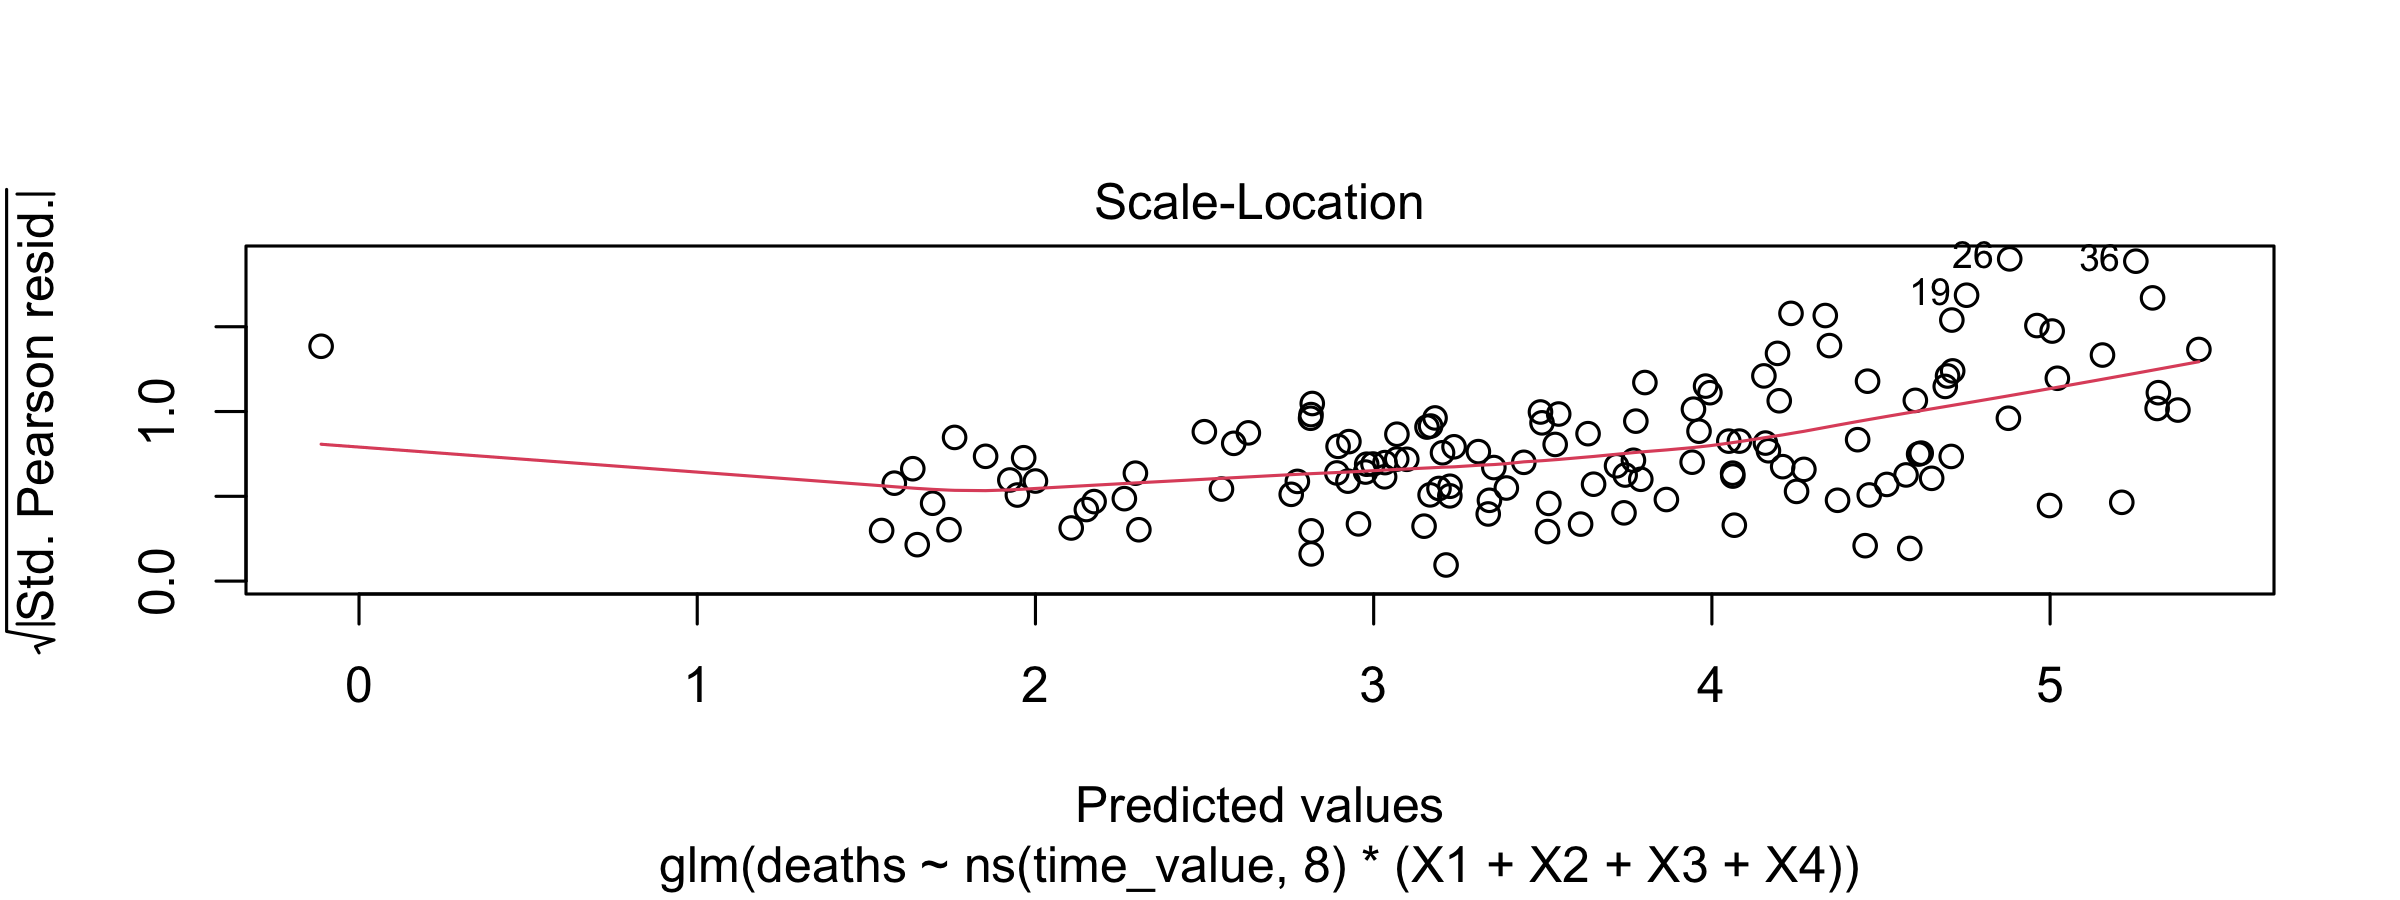

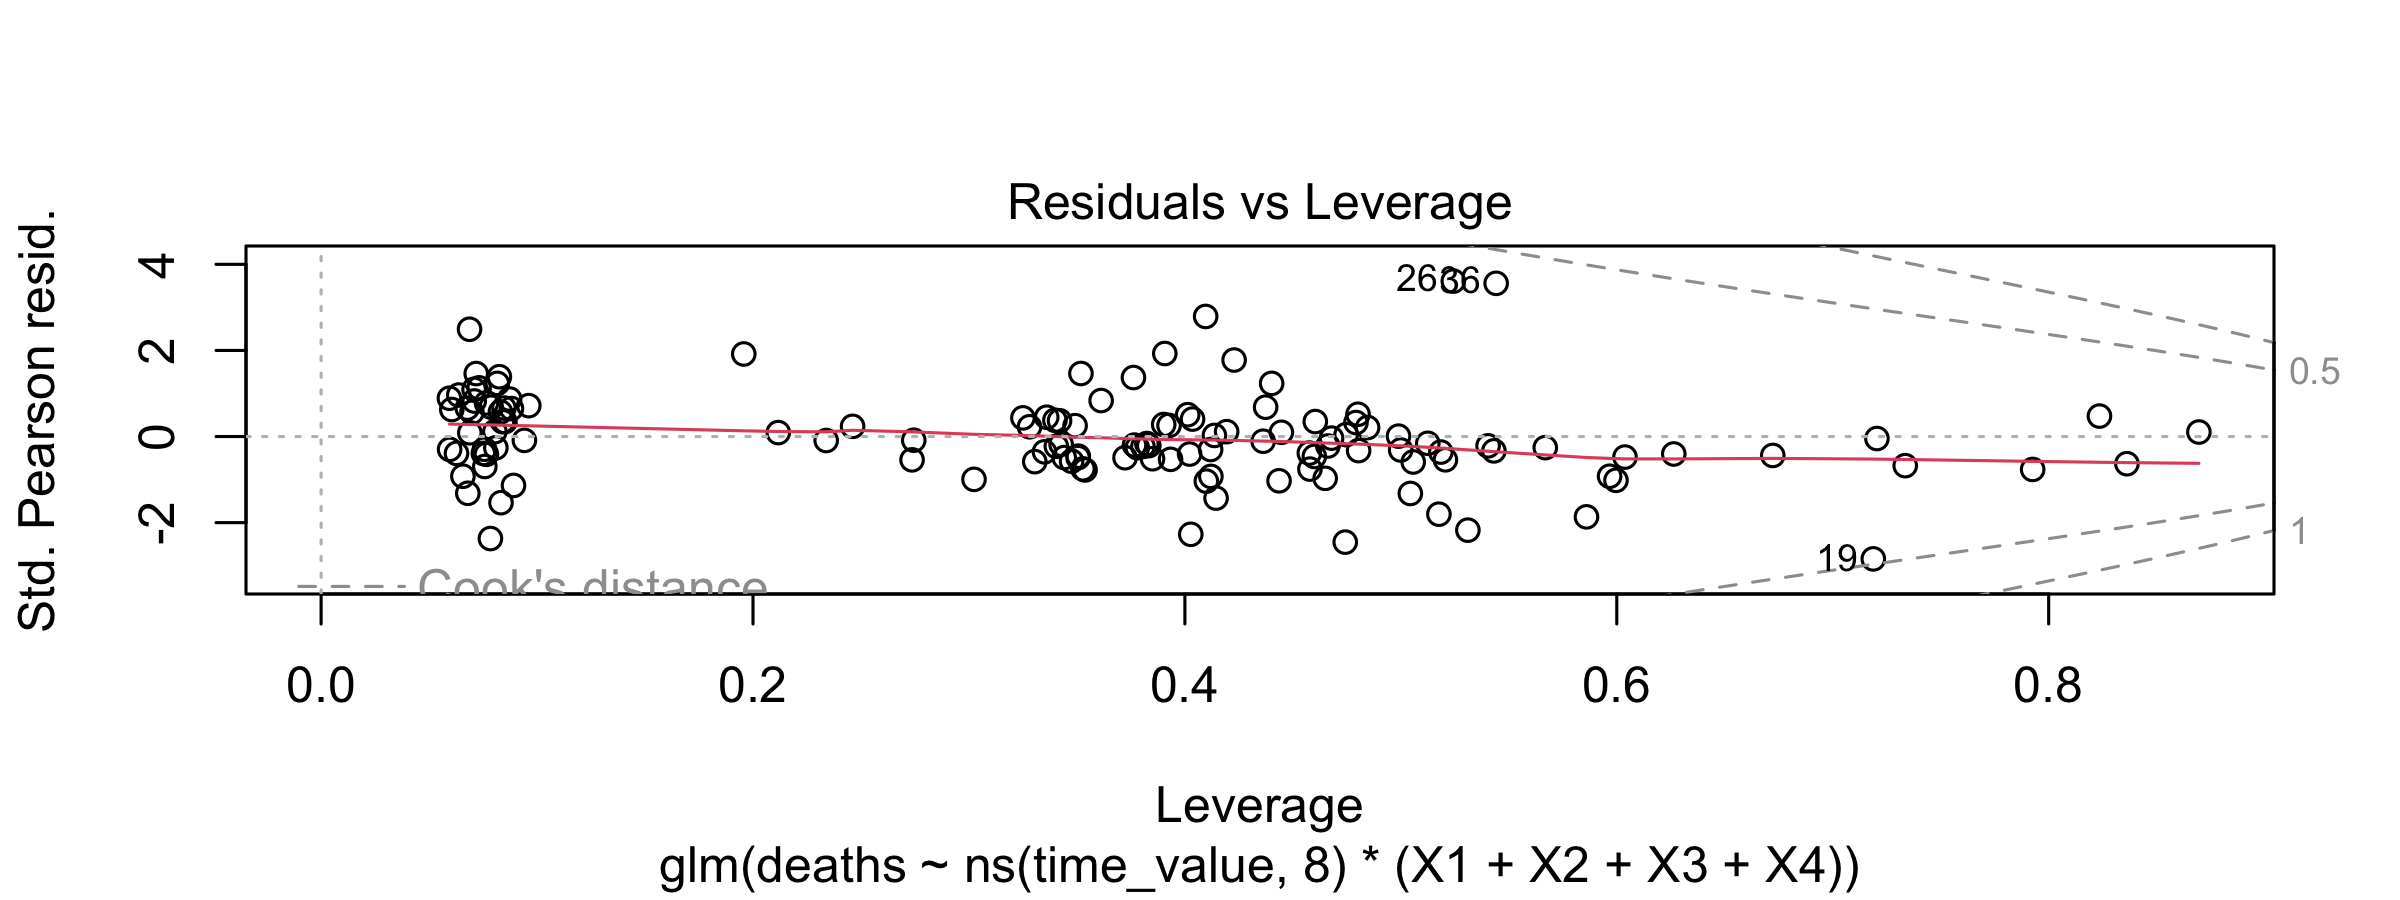

In [147]:
plot(result_3)

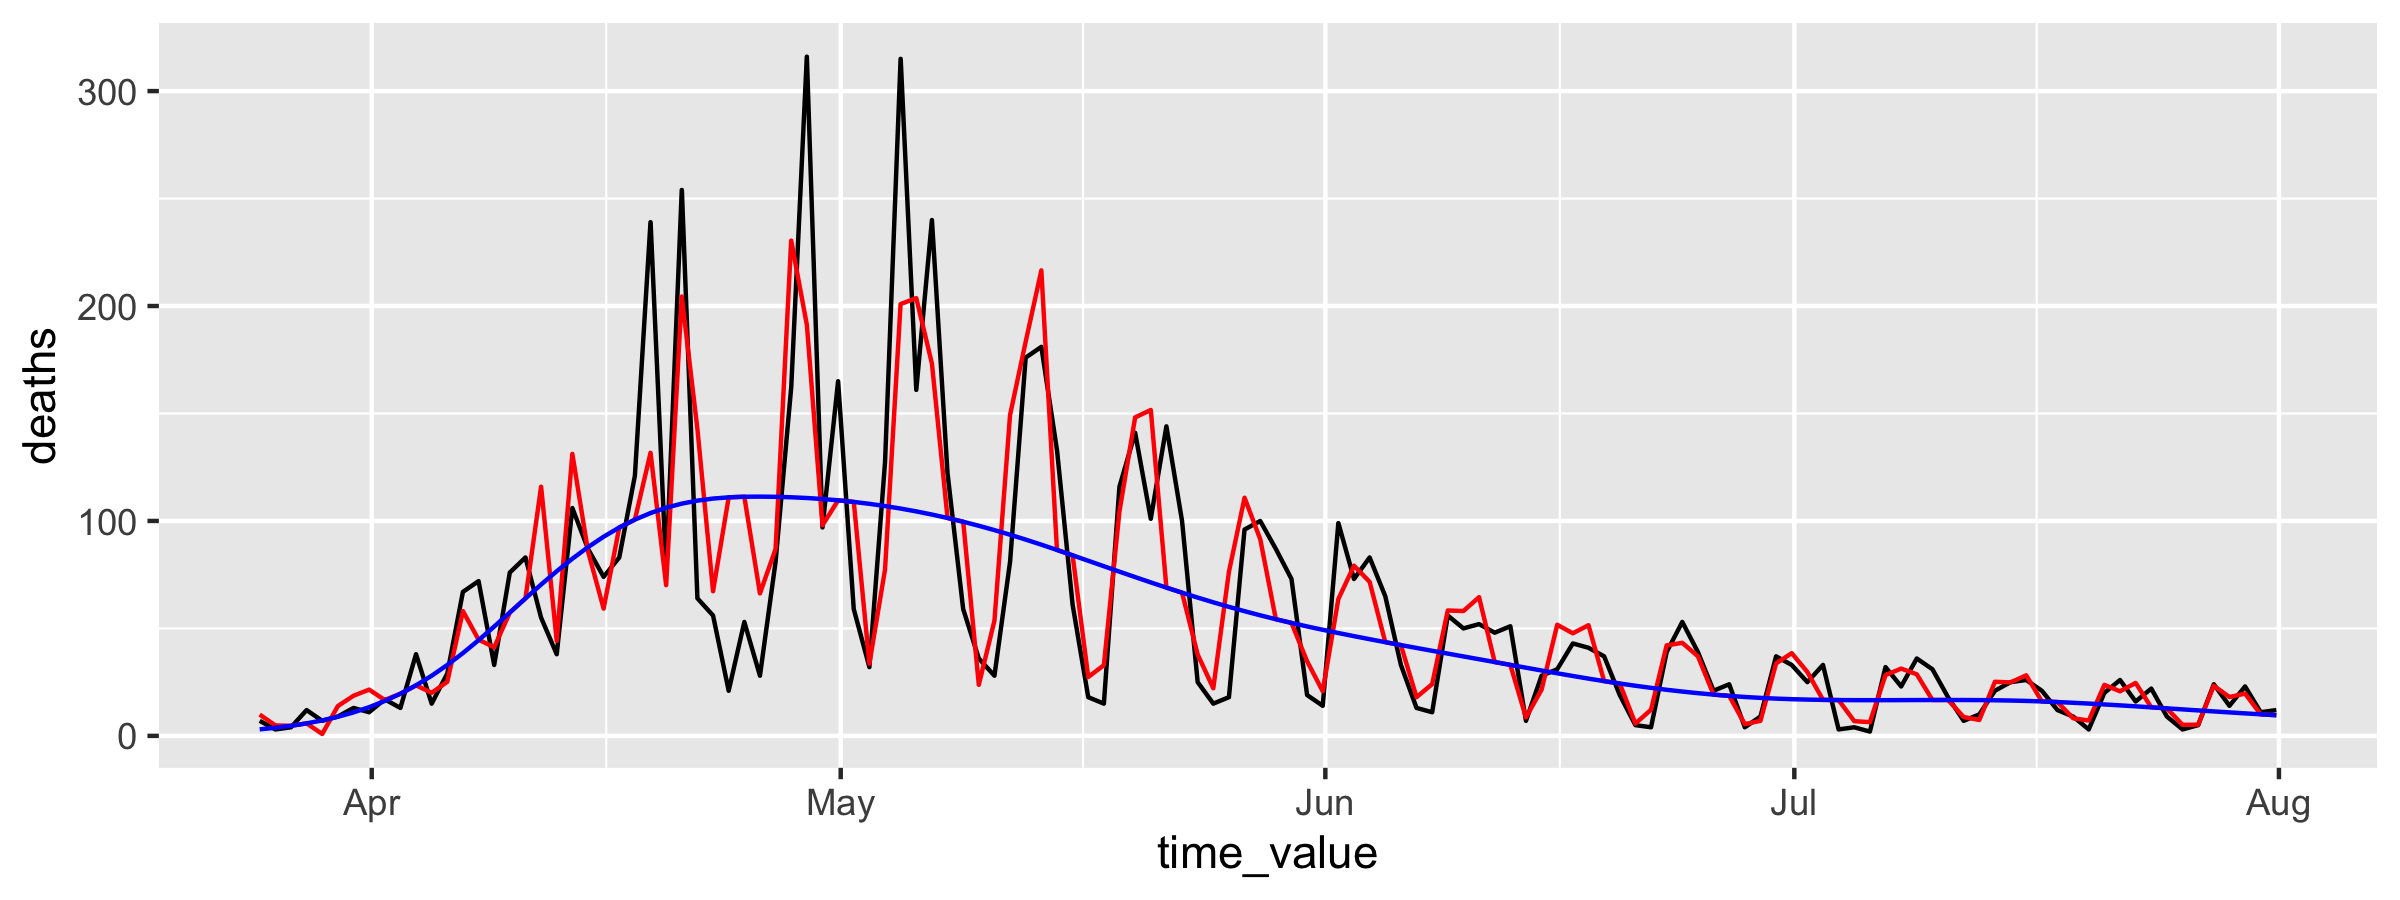

In [148]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths)) +
geom_line(aes(x = time_value, y = exp(predict(result_3))), color='red') +
geom_line(aes(x = time_value, y = exp(predict(result_3, newdata=data_nwe))), color='blue')

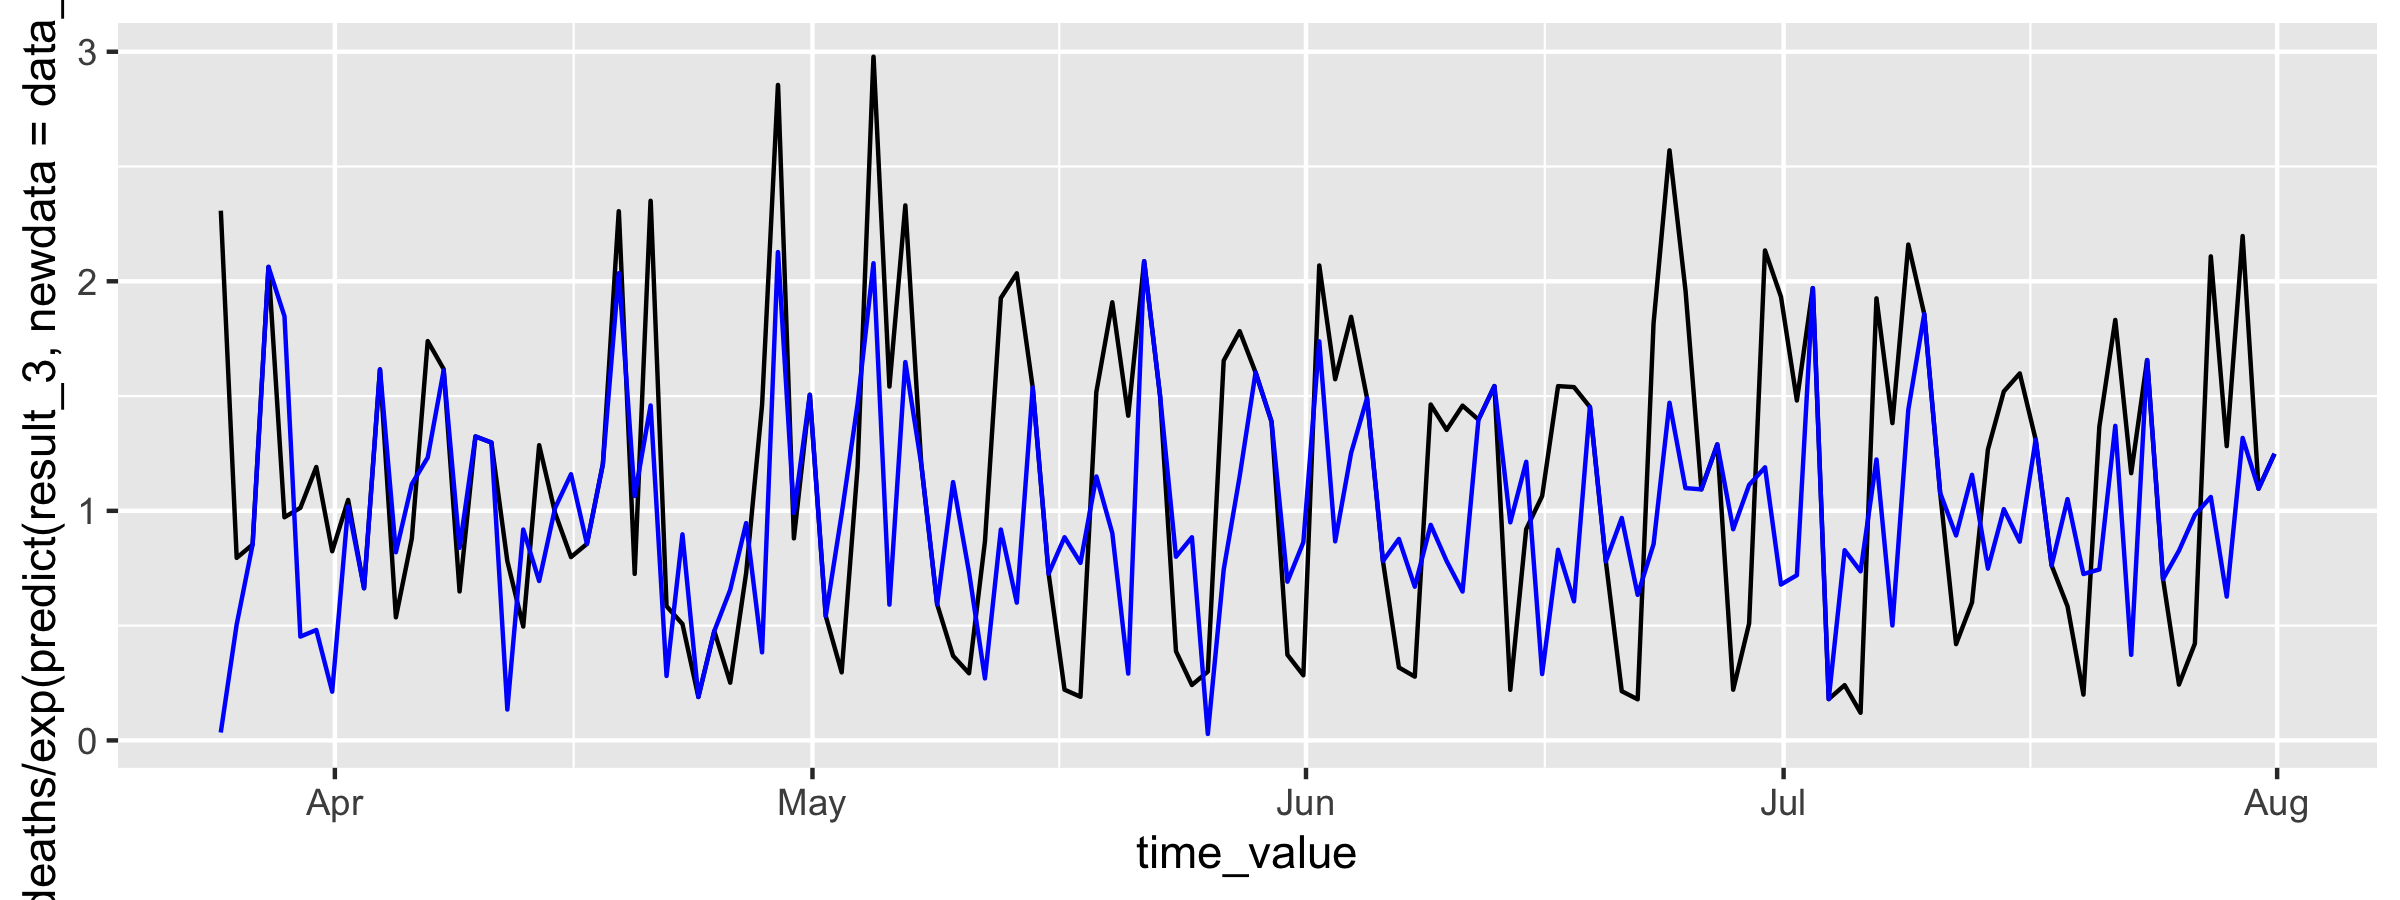

In [149]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths / exp(predict(result_3, newdata=data_nwe)))) +
geom_line(aes(x = time_value, 
              y = (deaths - exp(predict(result_3)) + exp(predict(result_3, newdata=data_nwe))) 
                  / exp(predict(result_3, newdata=data_nwe))), color='blue')

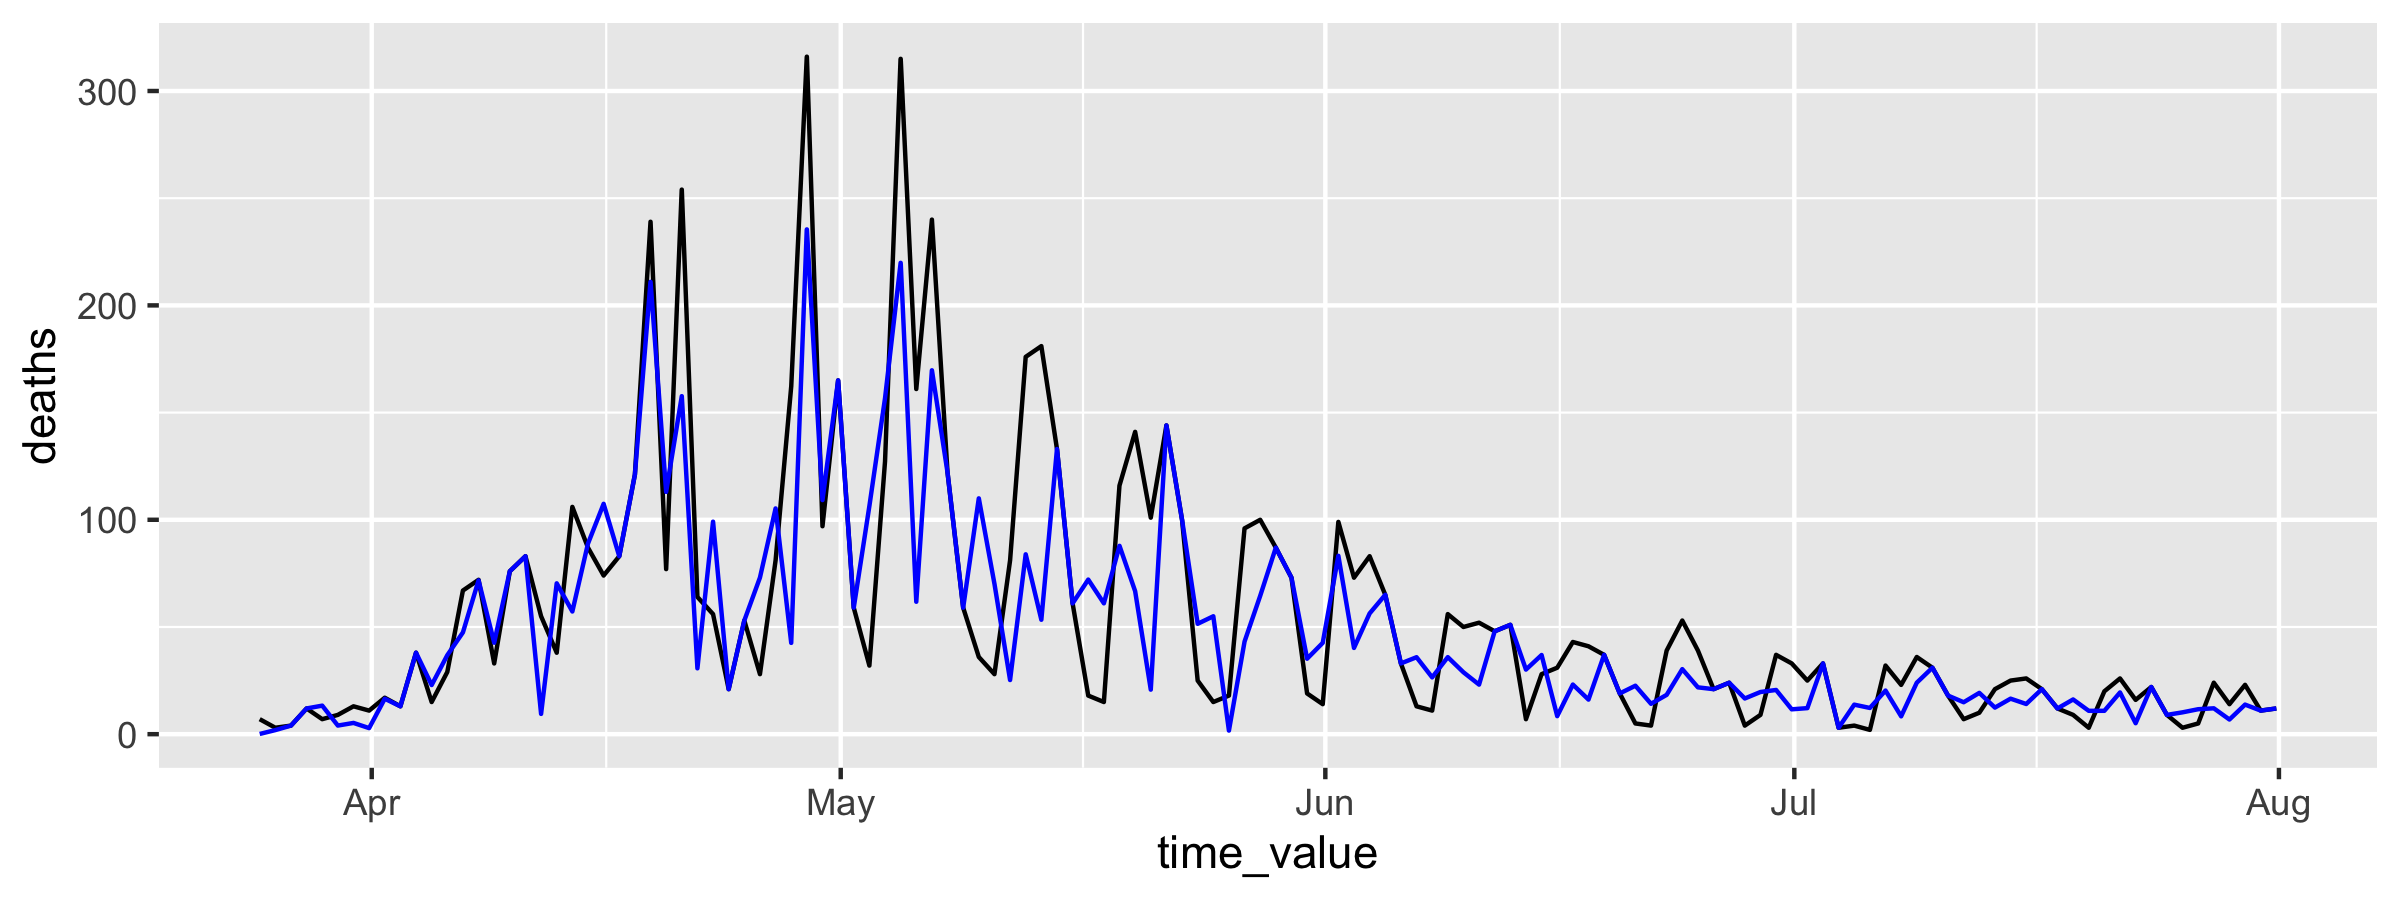

In [150]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths)) +
geom_line(aes(x = time_value, y = deaths - exp(predict(result_3)) +exp(predict(result_3, newdata=data_nwe))), color='blue')

In [140]:
result_4 = glm(deaths / exp(predict(result_1)) ~ X1 + X2 + X3 + X4, data=data_we)

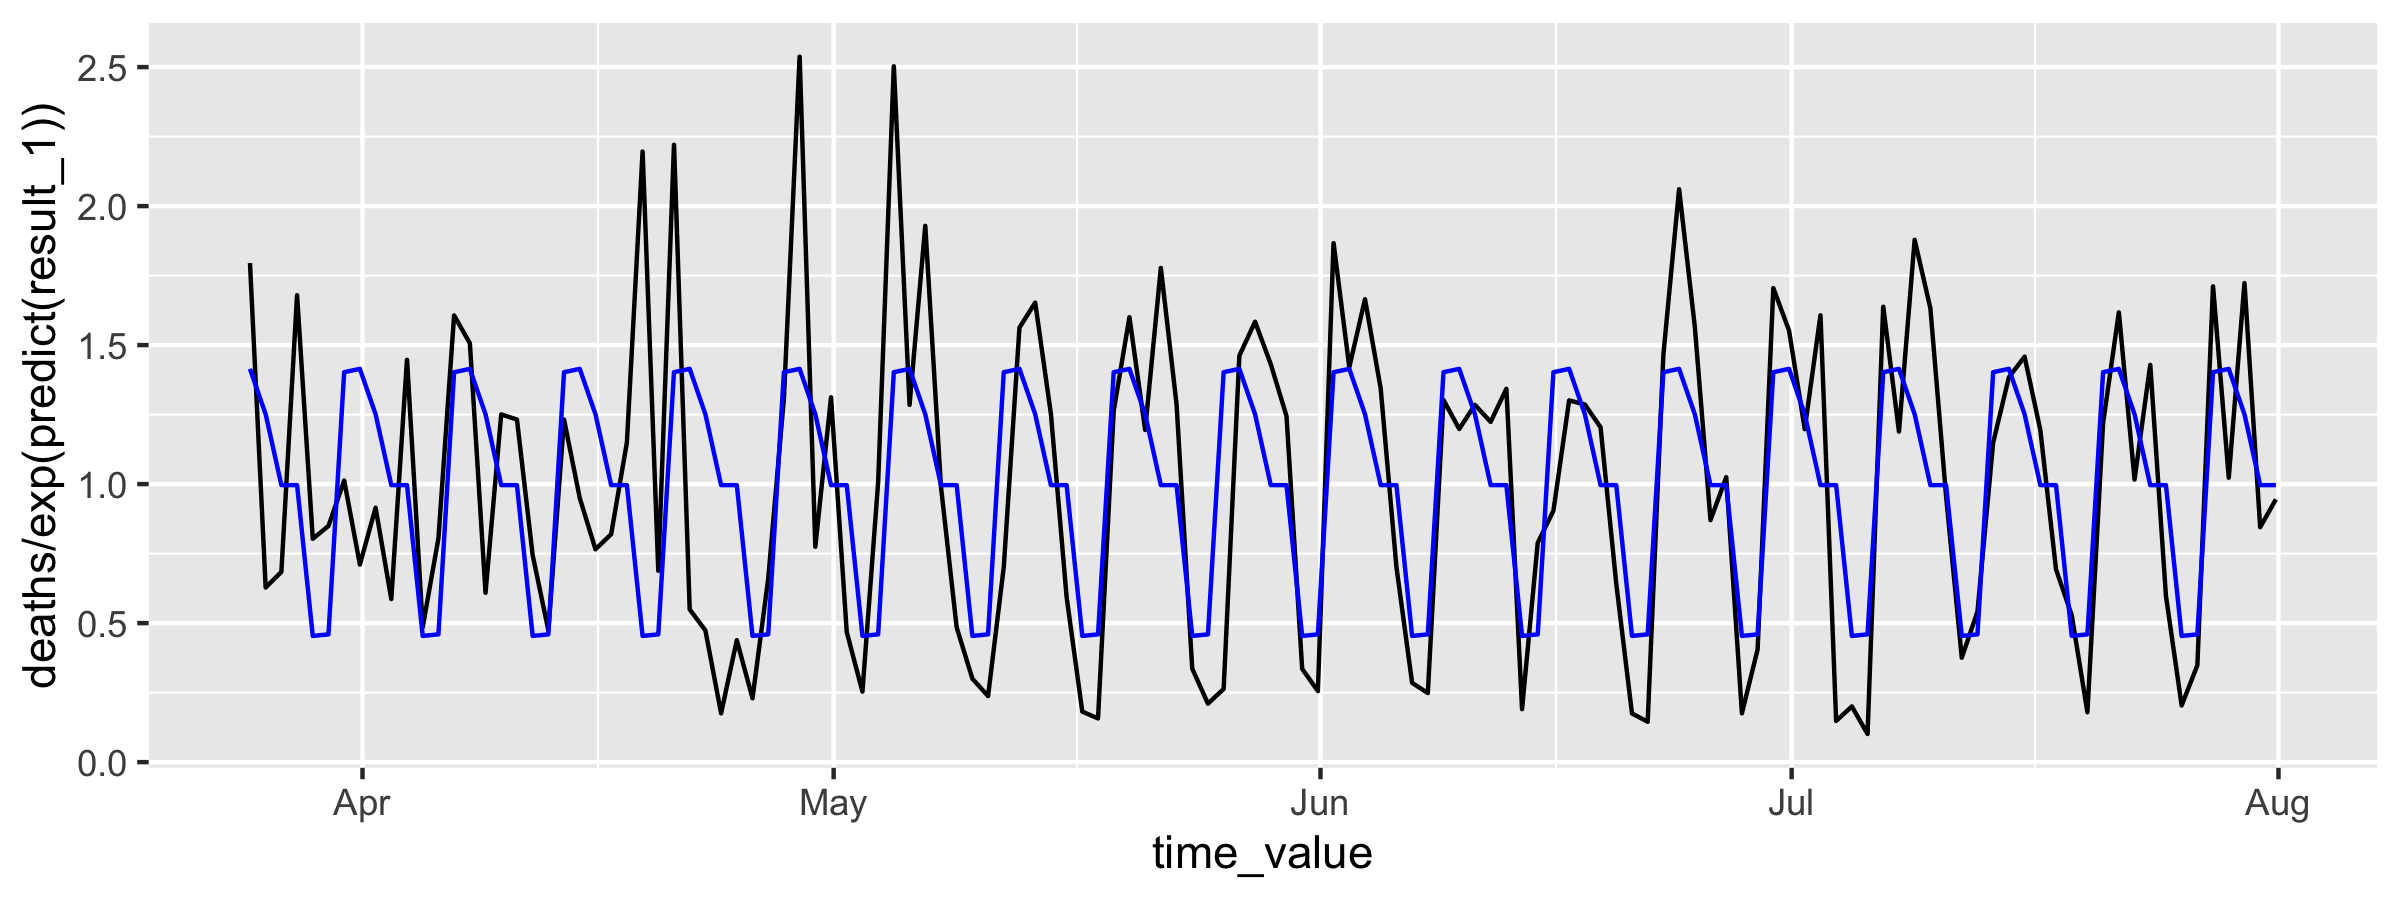

In [141]:
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths / exp(predict(result_1)))) +
geom_line(aes(x = time_value, y = predict(result_4)), color='blue')

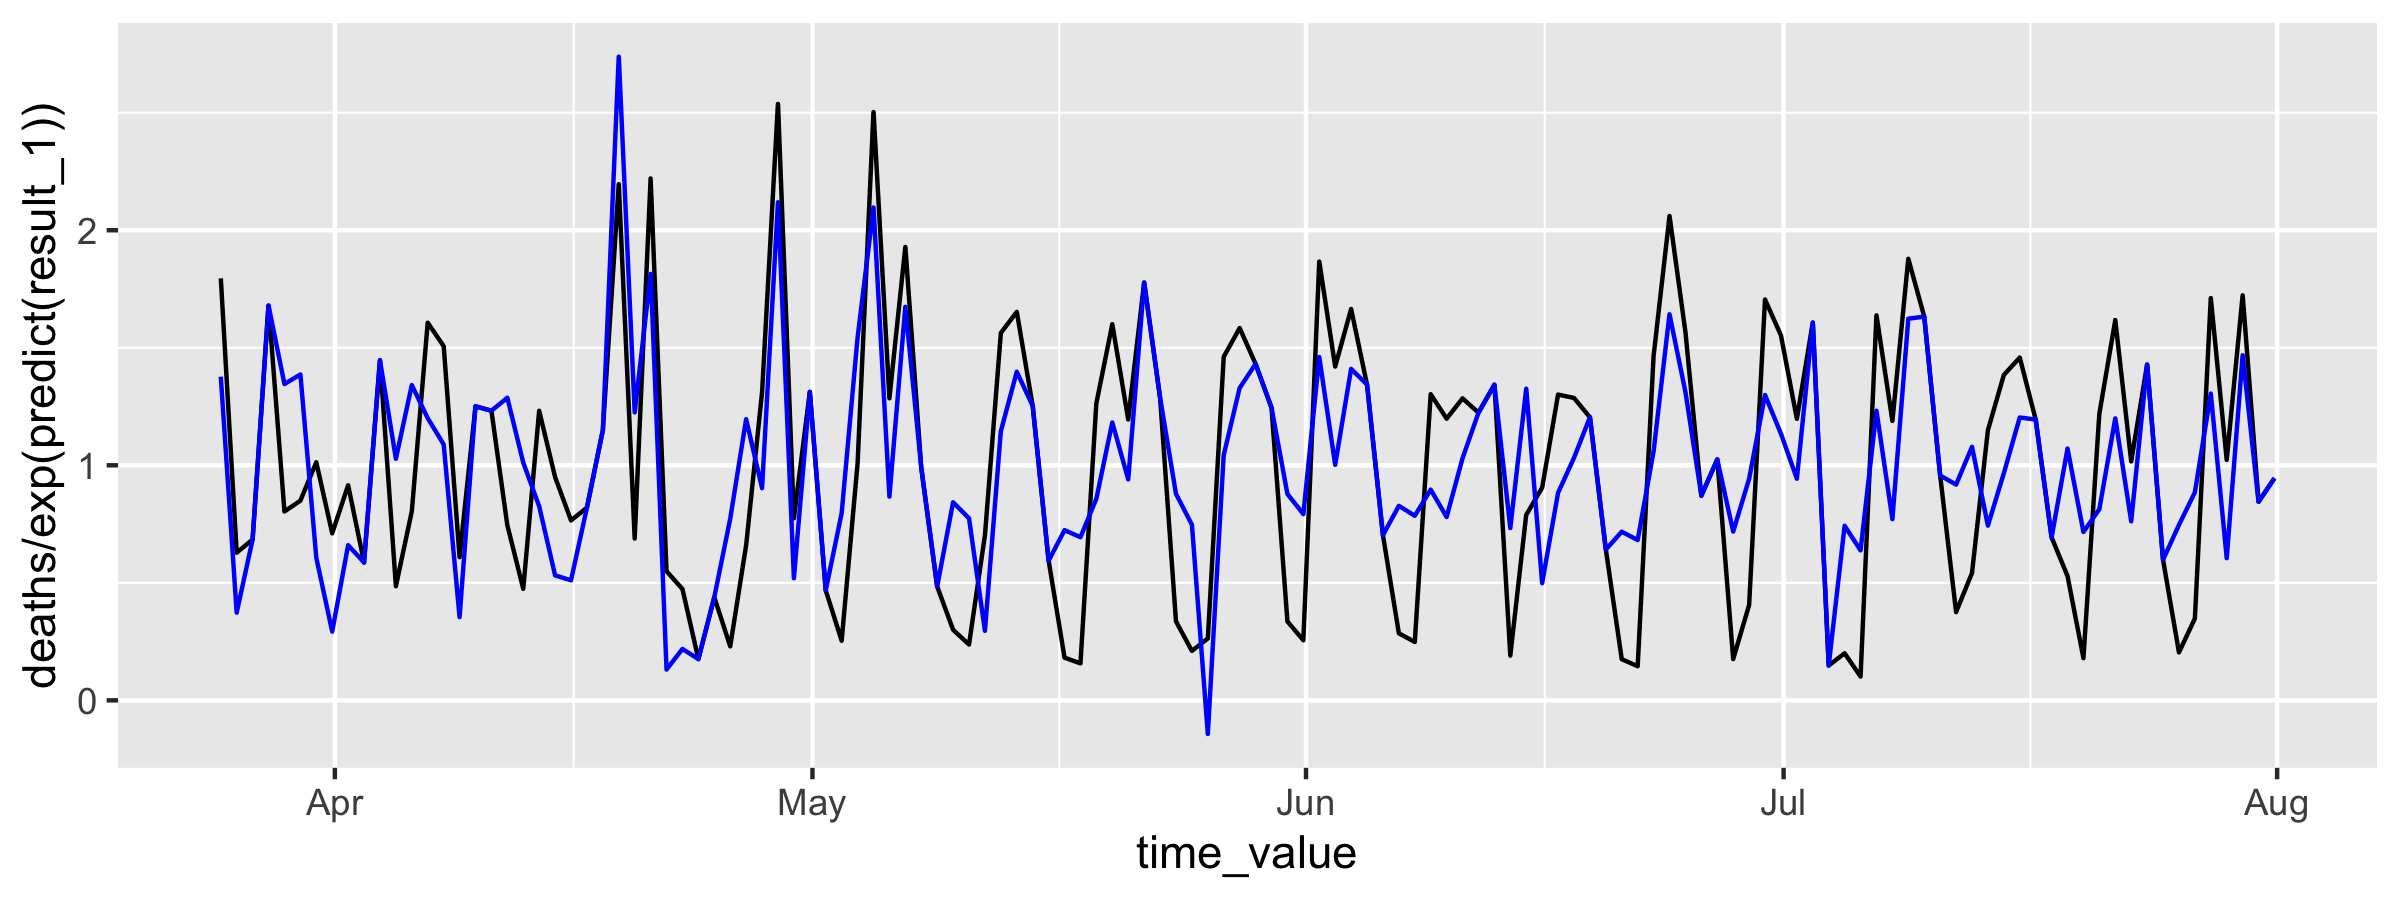

In [143]:
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths / exp(predict(result_1)))) +
geom_line(aes(x = time_value, y = (deaths / exp(predict(result_1)) - predict(result_4) + predict(result_4,newdata=data_nwe))), color='blue')

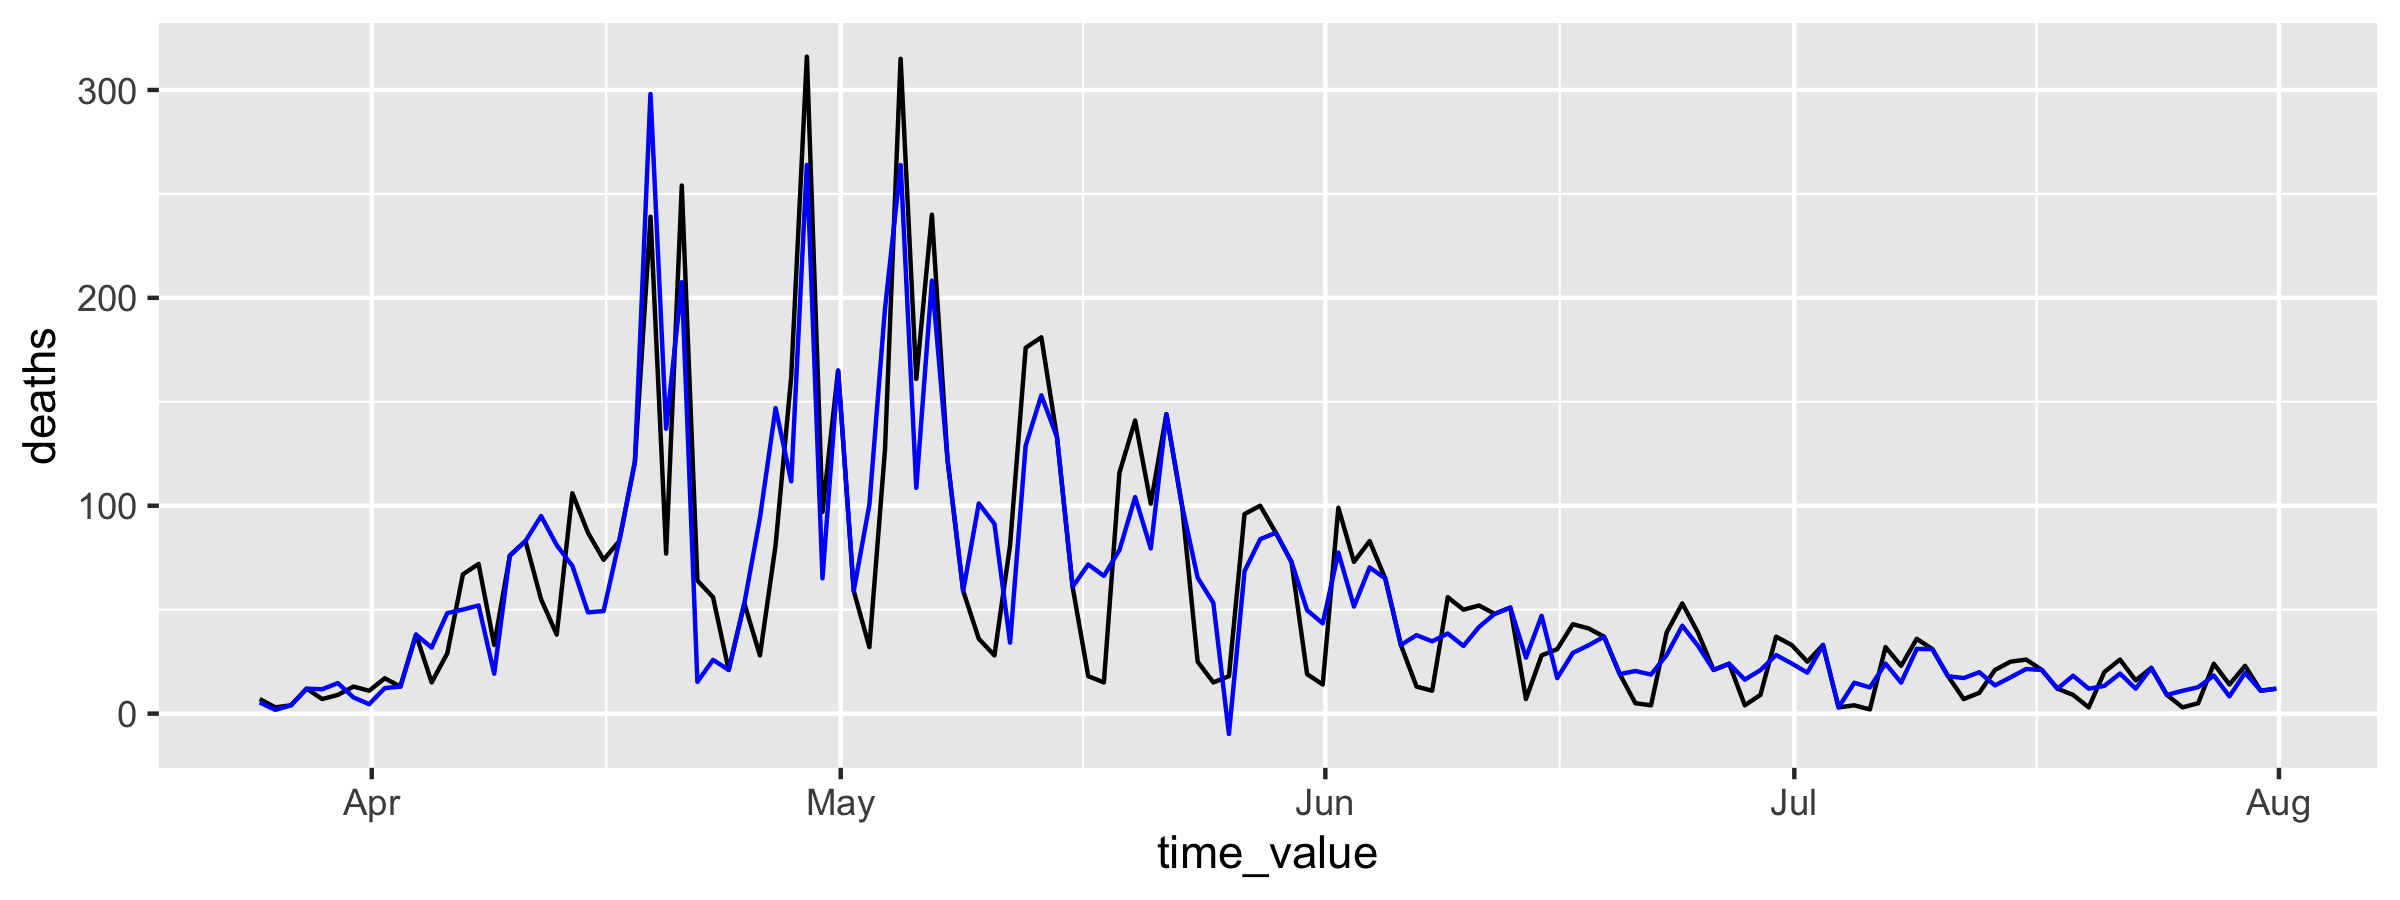

In [142]:
ggplot(data = data_we) +
geom_line(aes(x = time_value, y = deaths)) +
geom_line(aes(x = time_value, 
              y = (deaths / exp(predict(result_1)) - predict(result_4) + predict(result_4,newdata=data_nwe)) * exp(predict(result_1))),
          color='blue')